<a href="https://colab.research.google.com/github/zkazmi7/Machine_Learning/blob/main/Final_ZKazmi_ML_Research_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install sas7bdat

  Preparing metadata (setup.py) ... done
  Created wheel for sas7bdat: filename=sas7bdat-2.2.3-py3-none-any.whl size=16290 sha256=b83aeef68fe1dda9ebac2f4f0a2dbc3e58daffef9cc732b9d0c3d6126dc77cd0
  Stored in directory: /root/.cache/pip/wheels/d2/ad/aa/badcd17bd07e0df1adfc85e738acc942787648fb7ed4044543
Successfully built sas7bdat


In [2]:
pip install lsanomaly

  Preparing metadata (setup.py) ... done
  Created wheel for lsanomaly: filename=lsanomaly-0.1.3-py2.py3-none-any.whl size=7110 sha256=694d5a0cb9705de3e30138c513b4dca04f2d2e5a70bae335d2e7537f8980b4bf
  Stored in directory: /root/.cache/pip/wheels/54/83/09/7c98ddfa6a20f4f6c1f26e2d61cd8147ee540f93f5933f283d
Successfully built lsanomaly


In [3]:


import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sas7bdat import SAS7BDAT
from   sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from   sklearn.linear_model import LogisticRegression
from   sklearn.ensemble import RandomForestClassifier



In [4]:
from   sklearn.model_selection import train_test_split
from   sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from   sklearn.linear_model import LogisticRegression
from   sklearn.ensemble import RandomForestClassifier

In [5]:
with SAS7BDAT('/content/ds1302.sas7bdat') as file:
    main_data = file.to_data_frame()

print(main_data.head())

[ds1302.sas7bdat] header length 65536 != 8192


   yeartx  sex        age    intxsurv  graftype  dead  anc   intxanc  plt  \
0  2008.0  1.0  21.620808    4.375000       2.0   1.0  1.0  0.625000  1.0   
1  2008.0  1.0  60.186174    4.868421       1.0   1.0  1.0  0.657895  0.0   
2  2008.0  2.0  50.546201    2.861842       1.0   1.0  1.0  0.493421  1.0   
3  2008.0  1.0  21.585216  104.868421       2.0   1.0  1.0  0.460526  1.0   
4  2008.0  1.0  41.119781  145.526316       2.0   0.0  1.0  0.394737  1.0   

    intxplt  ...    pseudoid   pseudoccn  hctcigp2  dis  gvhdprgp  rbcreduc13  \
0  0.855263  ...  86452655.0  21402410.0       0.0  2.0       4.0        -9.1   
1  4.868421  ...  86451227.0  21402461.0       1.0  1.0       2.0         1.0   
2  0.592105  ...  86450857.0  21402589.0      99.0  1.0       1.0         1.0   
3  0.427632  ...  86457903.0  21402437.0       1.0  1.0       4.0        -9.1   
4  0.559211  ...  86457507.0  21405546.0       0.0  2.0       1.0        -9.1   

   buffycp13  rbcreduc4  buffycp4  plasmarmv  
0  

In [6]:
for col in main_data.columns:
    print(col)
    print(main_data[col].isnull().sum())

yeartx
0
sex
0
age
0
intxsurv
0
graftype
0
dead
0
anc
0
intxanc
14
plt
0
intxplt
3
dwoplt
0
agvhd24
0
intxagvhd24
45
dwoagvhd24
0
cgvhd
0
intxcgvhd
43
dwocgvhd
0
rel
0
intxrel
46
trm
0
dfs
0
donorgp
0
drcmvpr
0
drsex
0
drabomatch
0
hctcigp
0
agegp
0
racegp
0
karnofcat
0
condtbi
0
alstatprgp
0
drrh
0
dagegp
0
dnrage_urd
1776
agvhd34
0
intxagvhd34
49
dwoagvhd34
0
gvhdprgp2
0
atgcampathgp2
0
dwoancrel
0
pgf
0
pseudoid
0
pseudoccn
0
hctcigp2
0
dis
0
gvhdprgp
0
rbcreduc13
0
buffycp13
0
rbcreduc4
0
buffycp4
0
plasmarmv
0


In [7]:
#replacing null values
#fixing null values originally replaced with 99
valid_cols = ['racegp', 'hctcigp', 'hctcigp2', 'karnofcat', 'alstatprgp', 'condtbi', 'gvhdprgp2', 'atgcampathgp2', 'dagegp', 'drrh', 'drcmvpr', 'rbcreduc13', 'buffycp13', 'rbcreduc4', 'buffycp4', 'plasmarmv', 'anc', 'dwoancrel', 'plt', 'dwoplt', 'agvhd24', 'dwoagvhd24', 'agvhd34', 'dwoagvhd34', 'cgvhd', 'dwocgvhd', 'dfs', 'trm', 'rel', 'dead', 'pgf']
for col in valid_cols:
    main_data[col].replace(99, None, inplace=True)
    main_data[col].replace(99.1, None, inplace=True)
    main_data[col].replace(99.2, None, inplace=True)
    main_data[col].replace(99.3, None, inplace=True)
    main_data[col].replace(-9.3, None, inplace=True)
    main_data[col].replace(-9.2, None, inplace=True)
    main_data[col].replace(-9.1, None, inplace=True)



In [8]:

numerical_columns = ['age']

for col in main_data.columns:
    if col in numerical_columns:
      main_data[col].fillna(main_data[col].mean(), inplace=True)
    else:
      main_data[col].fillna(main_data[col].mode().iloc[0], inplace=True)


In [9]:
# drop columns
main_data = main_data.drop('dnrage_urd', axis=1)
main_data = main_data.drop('pseudoid', axis=1)
main_data = main_data.drop('yeartx', axis=1)

In [10]:
import sklearn
print('The scikit-learn version is {}.'.format(sklearn.__version__))

The scikit-learn version is 1.2.2.


In [11]:
cols_drop = ['anc', 'dwoancrel', 'intxanc', 'plt', 'dwoplt', 'intxplt', 'agvhd24', 'dwoagvhd24', 'intxagvhd24', 'agvhd34', 'dwoagvhd34', 'intxagvhd34', 'cgvhd', 'dwocgvhd', 'intxcgvhd', 'dfs', 'trm', 'rel', 'intxrel', 'dead', 'intxsurv', 'pgf']


In [12]:
cols_feat = []

for col in main_data.columns:
    if col not in cols_drop:
        cols_feat.append(col)

In [13]:
from sklearn.metrics import mean_absolute_error, make_scorer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.base import BaseEstimator, TransformerMixin

In [14]:
class TargetEncoder(BaseEstimator, TransformerMixin):
    """Target encoder.

    Replaces categorical column(s) with the mean target value for
    each category.

    """

    def __init__(self, cols=None):
        """Target encoder

        Parameters
        ----------
        cols : list of str
            Columns to target encode.  Default is to target encode all
            categorical columns in the DataFrame.
        """
        if isinstance(cols, str):
            self.cols = [cols]
        else:
            self.cols = cols


    def fit(self, X, y):
        """Fit target encoder to X and y

        Parameters
        ----------
        X : pandas DataFrame, shape [n_samples, n_columns]
            DataFrame containing columns to encode
        y : pandas Series, shape = [n_samples]
            Target values.

        Returns
        -------
        self : encoder
            Returns self.
        """

        # Encode all categorical cols by default
        if self.cols is None:
            self.cols = [col for col in X
                         if str(X[col].dtype)=='object']

        # Check columns are in X
        for col in self.cols:
            if col not in X:
                raise ValueError('Column \''+col+'\' not in X')

        # Encode each element of each column
        self.maps = dict() #dict to store map for each column
        for col in self.cols:
            tmap = dict()
            uniques = X[col].unique()
            for unique in uniques:
                tmap[unique] = y[X[col]==unique].mean()
            self.maps[col] = tmap

        return self


    def transform(self, X, y=None):
        """Perform the target encoding transformation.

        Parameters
        ----------
        X : pandas DataFrame, shape [n_samples, n_columns]
            DataFrame containing columns to encode

        Returns
        -------
        pandas DataFrame
            Input DataFrame with transformed columns
        """
        Xo = X.copy()
        for col, tmap in self.maps.items():
            vals = np.full(X.shape[0], np.nan)
            for val, mean_target in tmap.items():
                vals[X[col]==val] = mean_target
            Xo[col] = vals
        return Xo


    def fit_transform(self, X, y=None):
        """Fit and transform the data via target encoding.

        Parameters
        ----------
        X : pandas DataFrame, shape [n_samples, n_columns]
            DataFrame containing columns to encode
        y : pandas Series, shape = [n_samples]
            Target values (required!).

        Returns
        -------
        pandas DataFrame
            Input DataFrame with transformed columns
        """
        return self.fit(X, y).transform(X, y)


In [15]:
te = TargetEncoder()
for cols in cols_feat:
    if cols not in numerical_columns:
        te.fit(main_data[[cols]], main_data['dead'])
        main_data[cols] = te.transform(main_data[[cols]])

main_data.head()

,sex,age,intxsurv,graftype,dead,anc,intxanc,plt,intxplt,dwoplt,...,pgf,pseudoccn,hctcigp2,dis,gvhdprgp,rbcreduc13,buffycp13,rbcreduc4,buffycp4,plasmarmv
0,1.0,21.620808,4.375000,2.0,1.0,1.0,0.625000,1.0,0.855263,0.0,...,0.0,21402410.0,0.0,2.0,4.0,1.0,0.0,0.0,0.0,1.0
1,1.0,60.186174,4.868421,1.0,1.0,1.0,0.657895,0.0,4.868421,1.0,...,0.0,21402461.0,1.0,1.0,2.0,1.0,0.0,0.0,0.0,0.0
2,2.0,50.546201,2.861842,1.0,1.0,1.0,0.493421,1.0,0.592105,0.0,...,0.0,21402589.0,2.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0
3,1.0,21.585216,104.868421,2.0,1.0,1.0,0.460526,1.0,0.427632,0.0,...,0.0,21402437.0,1.0,1.0,4.0,1.0,0.0,0.0,0.0,1.0
4,1.0,41.119781,145.526316,2.0,0.0,1.0,0.394737,1.0,0.559211,0.0,...,0.0,21405546.0,0.0,2.0,1.0,1.0,0.0,0.0,0.0,1.0


In [16]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# applying standard scaler to numerical columns

for col in numerical_columns:
    main_data[col] = scaler.fit_transform(main_data[[col]])

In [17]:
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE

In [18]:




cols_features = cols_feat

cols_outcome = ['anc', 'dwoancrel', 'plt', 'dwoplt', 'agvhd24', 'dwoagvhd24',  'agvhd34', 'dwoagvhd34',  'cgvhd', 'dwocgvhd',  'dfs', 'trm', 'rel',  'dead', 'pgf']


#assert len(cols_feat) + 1 == main_data.shape[1]

X = main_data[cols_features]
y = main_data[cols_outcome]

print(X.shape)
print(y.shape)
print(main_data.shape)

(4946, 26)
(4946, 15)
(4946, 48)


# Anomaly Detection Models for Imbalanced Classes:

In [19]:
from   sklearn.ensemble import IsolationForest
from   sklearn.neighbors import LocalOutlierFactor
from   sklearn import svm
from lsanomaly import LSAnomaly
import lsanomaly
import matplotlib.pyplot as plt
from   copy import deepcopy

## Isolation Forest Model

In [20]:
for i in range(len(cols_outcome)):
  outcome = cols_outcome[i] #outcome is the label we are currently running the model on
  y_i=y[outcome] # y_i is the outcome data for the label outcome

  #split our data into X and y
  X_train, X_test, y_train, y_test = train_test_split(X, y_i, test_size = 0.2, random_state = 42, stratify=y_i)

  #checking if this label is balanced or imbalanced
  ratio = y_i.sum() / len(y_i)
  print("\n")
  print(outcome, "Ratio: ", ratio)
  if ratio >= .7:
    inliers  = main_data[main_data[outcome] == 1]
    inliers  = inliers.drop([outcome], axis=1)
    outliers = main_data[main_data[outcome]== 0]
    outliers = outliers.drop([outcome], axis=1)
    inliers_train, inliers_test = train_test_split(inliers, test_size = 0.2, random_state = 42)
  elif ratio <= .3:
    inliers  = main_data[main_data[outcome] == 0]
    inliers  = inliers.drop([outcome], axis=1)
    outliers = main_data[main_data[outcome]== 1]
    outliers = outliers.drop([outcome], axis=1)
    inliers_train, inliers_test = train_test_split(inliers, test_size = 0.2, random_state = 42)

  #if the label is imbalanced, run anomany classification models
  if ratio >= .7 or ratio <= .3:

    #oversample the data to make up for the imbalance
    sm = SMOTE(sampling_strategy='minority', random_state=42)
    X_res, y_res = sm.fit_resample(X_train, y_train)
    X_train = X_res
    y_train = y_res

    #run Isolation forest model
    model = IsolationForest(n_estimators = 500)
    model.fit(inliers_train)
    inlier_pred_test = model.predict(inliers_test)
    outlier_pred     = model.predict(outliers)

    print("Accuracy in negative class for Isolation Forest Model:", list(inlier_pred_test).count(1)/inlier_pred_test.shape[0])
    print("Accuracy in positive class for Isolation Forest Model:", list(outlier_pred).count(-1)/outlier_pred.shape[0])
  else:
    print("Balanced class, Isolation Forest Model unnecessary.")






anc Ratio:  0.9811969268095431
Accuracy in negative class for Isolation Forest Model: 0.6961894953656025
Accuracy in positive class for Isolation Forest Model: 0.946236559139785


dwoancrel Ratio:  0.01678123736352608
Accuracy in negative class for Isolation Forest Model: 0.7194244604316546
Accuracy in positive class for Isolation Forest Model: 0.9397590361445783


plt Ratio:  0.9458147998382531
Accuracy in negative class for Isolation Forest Model: 0.7061965811965812
Accuracy in positive class for Isolation Forest Model: 0.7276119402985075


dwoplt Ratio:  0.04892842701172665
Accuracy in negative class for Isolation Forest Model: 0.7555791710945803
Accuracy in positive class for Isolation Forest Model: 0.8966942148760331


agvhd24 Ratio:  0.3896077638495754
Balanced class, Isolation Forest Model unnecessary.


dwoagvhd24 Ratio:  0.27213910230489285
Accuracy in negative class for Isolation Forest Model: 0.7666666666666667
Accuracy in positive class for Isolation Forest Model: 0.53714

## Local Outlier Factor

In [21]:
for i in range(len(cols_outcome)):
  outcome = cols_outcome[i] #outcome is the label we are currently running the model on
  y_i=y[outcome] # y_i is the outcome data for the label outcome

  #split our data into X and y
  X_train, X_test, y_train, y_test = train_test_split(X, y_i, test_size = 0.2, random_state = 42, stratify=y_i)

  #checking if this label is balanced or imbalanced
  ratio = y_i.sum() / len(y_i)
  print("\n")
  print(outcome, "Ratio: ", ratio)
  if ratio >= .7:
    inliers  = main_data[main_data[outcome] == 1]
    inliers  = inliers.drop([outcome], axis=1)
    outliers = main_data[main_data[outcome]== 0]
    outliers = outliers.drop([outcome], axis=1)
    inliers_train, inliers_test = train_test_split(inliers, test_size = 0.2, random_state = 42)
  elif ratio <= .3:
    inliers  = main_data[main_data[outcome] == 0]
    inliers  = inliers.drop([outcome], axis=1)
    outliers = main_data[main_data[outcome]== 1]
    outliers = outliers.drop([outcome], axis=1)
    inliers_train, inliers_test = train_test_split(inliers, test_size = 0.2, random_state = 42)

  #if the label is imbalanced, run anomany classification models
  if ratio >= .7 or ratio <= .3:

    #oversample the data to make up for the imbalance
    sm = SMOTE(sampling_strategy='minority', random_state=42)
    X_res, y_res = sm.fit_resample(X_train, y_train)
    X_train = X_res
    y_train = y_res

    #run Local Outlier Factor model
    model = LocalOutlierFactor(novelty=True)
    model.fit(inliers_train)
    inlier_pred_test = model.predict(inliers_test)
    outlier_pred = model.predict(outliers)

    print("Accuracy in negative class for Local Outlier Factor Model:", list(inlier_pred_test).count(1)/inlier_pred_test.shape[0])
    print("Accuracy in positive class for Local Outlier Factor Model:", list(outlier_pred).count(-1)/outlier_pred.shape[0])
  else:
    print("Balanced class, Local Outlier Factor Model unnecessary.")





anc Ratio:  0.9811969268095431


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(


Accuracy in negative class for Local Outlier Factor Model: 0.94129763130793
Accuracy in positive class for Local Outlier Factor Model: 0.043010752688172046


dwoancrel Ratio:  0.01678123736352608


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(


Accuracy in negative class for Local Outlier Factor Model: 0.9547790339157246
Accuracy in positive class for Local Outlier Factor Model: 0.03614457831325301


plt Ratio:  0.9458147998382531


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(


Accuracy in negative class for Local Outlier Factor Model: 0.938034188034188
Accuracy in positive class for Local Outlier Factor Model: 0.029850746268656716


dwoplt Ratio:  0.04892842701172665


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(


Accuracy in negative class for Local Outlier Factor Model: 0.9553666312433581
Accuracy in positive class for Local Outlier Factor Model: 0.012396694214876033


agvhd24 Ratio:  0.3896077638495754
Balanced class, Local Outlier Factor Model unnecessary.


dwoagvhd24 Ratio:  0.27213910230489285


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(


Accuracy in negative class for Local Outlier Factor Model: 0.9638888888888889
Accuracy in positive class for Local Outlier Factor Model: 0.009658246656760773


agvhd34 Ratio:  0.14577436312171452


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(


Accuracy in negative class for Local Outlier Factor Model: 0.9526627218934911
Accuracy in positive class for Local Outlier Factor Model: 0.3065187239944521


dwoagvhd34 Ratio:  0.39446016983420945
Balanced class, Local Outlier Factor Model unnecessary.


cgvhd Ratio:  0.48119692680954307
Balanced class, Local Outlier Factor Model unnecessary.


dwocgvhd Ratio:  0.30752122927618275
Balanced class, Local Outlier Factor Model unnecessary.


dfs Ratio:  0.625353821269713
Balanced class, Local Outlier Factor Model unnecessary.


trm Ratio:  0.1957137080469066


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(


Accuracy in negative class for Local Outlier Factor Model: 0.9535175879396985
Accuracy in positive class for Local Outlier Factor Model: 0.014462809917355372


rel Ratio:  0.4284270117266478
Balanced class, Local Outlier Factor Model unnecessary.


dead Ratio:  0.547513141932875
Balanced class, Local Outlier Factor Model unnecessary.


pgf Ratio:  0.031540638900121314


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(


Accuracy in negative class for Local Outlier Factor Model: 0.9561586638830898
Accuracy in positive class for Local Outlier Factor Model: 0.08333333333333333


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(


## One-Class SVM



anc Ratio:  0.9811969268095431
Classification report for One-class SVM: 
              precision    recall  f1-score   support

         0.0       0.02      0.37      0.05        19
         1.0       0.98      0.71      0.82       971

    accuracy                           0.70       990
   macro avg       0.50      0.54      0.43       990
weighted avg       0.96      0.70      0.81       990



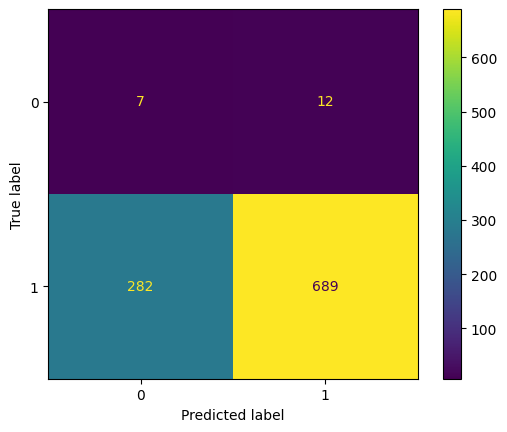



dwoancrel Ratio:  0.01678123736352608
Classification report for One-class SVM: 
              precision    recall  f1-score   support

         0.0       0.98      0.74      0.85       973
         1.0       0.02      0.24      0.03        17

    accuracy                           0.73       990
   macro avg       0.50      0.49      0.44       990
weighted avg       0.97      0.73      0.83       990



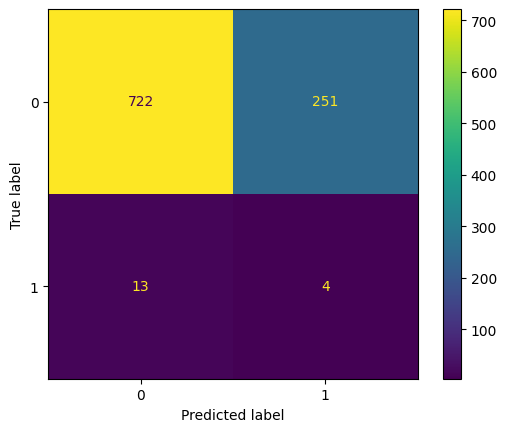



plt Ratio:  0.9458147998382531
Classification report for One-class SVM: 
              precision    recall  f1-score   support

         0.0       0.04      0.19      0.06        54
         1.0       0.94      0.74      0.82       936

    accuracy                           0.71       990
   macro avg       0.49      0.46      0.44       990
weighted avg       0.89      0.71      0.78       990



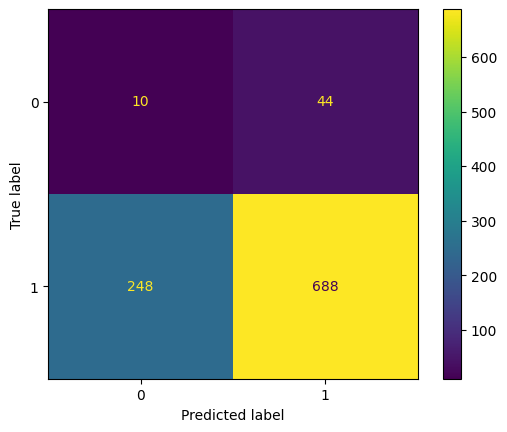



dwoplt Ratio:  0.04892842701172665
Classification report for One-class SVM: 
              precision    recall  f1-score   support

         0.0       0.95      0.72      0.82       942
         1.0       0.03      0.19      0.06        48

    accuracy                           0.69       990
   macro avg       0.49      0.45      0.44       990
weighted avg       0.90      0.69      0.78       990



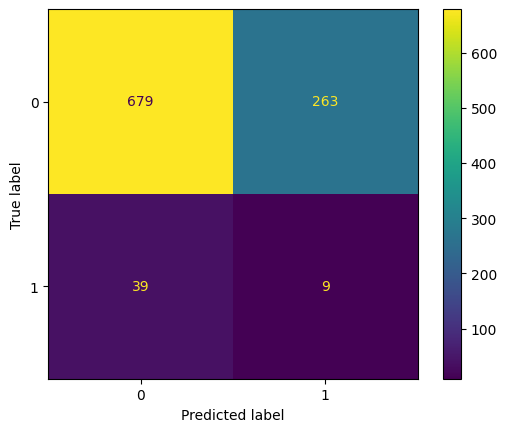



agvhd24 Ratio:  0.3896077638495754
Balanced class, One-Class SVM Model unnecessary.


dwoagvhd24 Ratio:  0.27213910230489285
Classification report for One-class SVM: 
              precision    recall  f1-score   support

         0.0       0.73      0.61      0.66       721
         1.0       0.27      0.39      0.32       269

    accuracy                           0.55       990
   macro avg       0.50      0.50      0.49       990
weighted avg       0.60      0.55      0.57       990



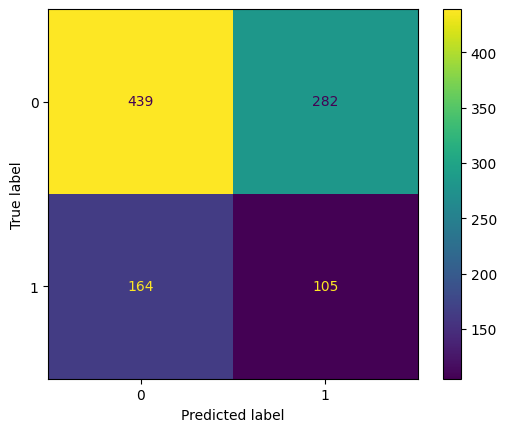



agvhd34 Ratio:  0.14577436312171452
Classification report for One-class SVM: 
              precision    recall  f1-score   support

         0.0       0.85      0.67      0.75       846
         1.0       0.14      0.33      0.20       144

    accuracy                           0.62       990
   macro avg       0.50      0.50      0.48       990
weighted avg       0.75      0.62      0.67       990



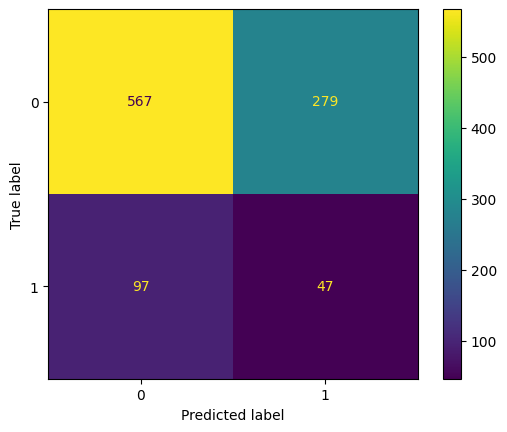



dwoagvhd34 Ratio:  0.39446016983420945
Balanced class, One-Class SVM Model unnecessary.


cgvhd Ratio:  0.48119692680954307
Balanced class, One-Class SVM Model unnecessary.


dwocgvhd Ratio:  0.30752122927618275
Balanced class, One-Class SVM Model unnecessary.


dfs Ratio:  0.625353821269713
Balanced class, One-Class SVM Model unnecessary.


trm Ratio:  0.1957137080469066
Classification report for One-class SVM: 
              precision    recall  f1-score   support

         0.0       0.81      0.66      0.73       796
         1.0       0.21      0.38      0.27       194

    accuracy                           0.60       990
   macro avg       0.51      0.52      0.50       990
weighted avg       0.70      0.60      0.64       990



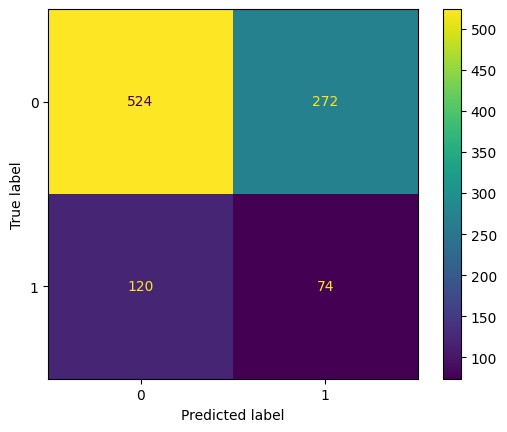



rel Ratio:  0.4284270117266478
Balanced class, One-Class SVM Model unnecessary.


dead Ratio:  0.547513141932875
Balanced class, One-Class SVM Model unnecessary.


pgf Ratio:  0.031540638900121314
Classification report for One-class SVM: 
              precision    recall  f1-score   support

         0.0       0.97      0.72      0.83       959
         1.0       0.03      0.26      0.05        31

    accuracy                           0.71       990
   macro avg       0.50      0.49      0.44       990
weighted avg       0.94      0.71      0.80       990



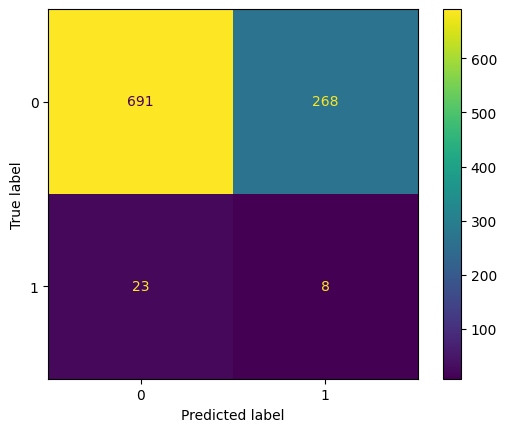

In [22]:
for i in range(len(cols_outcome)):
  outcome = cols_outcome[i] #outcome is the label we are currently running the model on
  y_i=y[outcome] # y_i is the outcome data for the label outcome

  #split our data into X and y
  X_train, X_test, y_train, y_test = train_test_split(X, y_i, test_size = 0.2, random_state = 42, stratify=y_i)

  #checking if this label is balanced or imbalanced
  ratio = y_i.sum() / len(y_i)
  print("\n")
  print(outcome, "Ratio: ", ratio)
  if ratio >= .7:
    inliers  = main_data[main_data[outcome] == 1]
    inliers  = inliers.drop([outcome], axis=1)
    outliers = main_data[main_data[outcome]== 0]
    outliers = outliers.drop([outcome], axis=1)
    inliers_train, inliers_test = train_test_split(inliers, test_size = 0.2, random_state = 42)
    #oversample the data to make up for the imbalance
    #sm = SMOTE(sampling_strategy='minority', random_state=42)
    sm = SMOTE(random_state=42)
    X_res, y_res = sm.fit_resample(X_train, y_train)
    X_train = X_res
    y_train = y_res

    #run one-class SVM
    model = svm.OneClassSVM(kernel="rbf", gamma='auto')
    model.fit(X_train)

    y_pred = model.predict(X_test)

    predictions = [1 if i==-1 else 0 for i in y_pred]
    print('Classification report for One-class SVM: ')
    print(classification_report(y_test, predictions))

    cm   = confusion_matrix(y_test, predictions, labels = [0, 1])
    disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [0, 1])
    disp.plot()
    plt.show()
  elif ratio <= .3:
    inliers  = main_data[main_data[outcome] == 0]
    inliers  = inliers.drop([outcome], axis=1)
    outliers = main_data[main_data[outcome]== 1]
    outliers = outliers.drop([outcome], axis=1)
    inliers_train, inliers_test = train_test_split(inliers, test_size = 0.2, random_state = 42)
    #oversample the data to make up for the imbalance
    #sm = SMOTE(sampling_strategy='minority', random_state=42)
    sm = SMOTE(random_state=42)
    X_res, y_res = sm.fit_resample(X_train, y_train)
    X_train = X_res
    y_train = y_res

    #run one-class SVM
    model = svm.OneClassSVM(kernel="rbf", gamma='auto')
    model.fit(X_train)

    y_pred = model.predict(X_test)

    predictions = [0 if i==-1 else 1 for i in y_pred]
    print('Classification report for One-class SVM: ')
    print(classification_report(y_test, predictions))

    cm   = confusion_matrix(y_test, predictions, labels = [0, 1])
    disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [0, 1])
    disp.plot()
    plt.show()

  #if the label is imbalanced, run anomany classification models
  # if ratio >= .7 or ratio <= .3:

  #   #oversample the data to make up for the imbalance
  #   #sm = SMOTE(sampling_strategy='minority', random_state=42)
  #   sm = SMOTE(random_state=42)
  #   X_res, y_res = sm.fit_resample(X_train, y_train)
  #   X_train = X_res
  #   y_train = y_res

  #   #run one-class SVM
  #   model = svm.OneClassSVM(kernel="rbf", gamma='auto')
  #   model.fit(X_train)

  #   y_pred = model.predict(X_test)

  #   predictions = [1 if i==-1 else 0 for i in y_pred]
  #   print('Classification report for One-class SVM: ')
  #   print(classification_report(y_test, predictions))

  #   cm   = confusion_matrix(y_test, predictions, labels = [0, 1])
  #   disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [0, 1])
  #   disp.plot()
  #   plt.show()

  else:
    print("Balanced class, One-Class SVM Model unnecessary.")



## Least-Squares Anomaly Detection



anc Ratio:  0.9811969268095431
              precision    recall  f1-score   support

         0.0       0.02      0.58      0.03        19
         1.0       0.98      0.37      0.54       971

    accuracy                           0.37       990
   macro avg       0.50      0.47      0.29       990
weighted avg       0.96      0.37      0.53       990



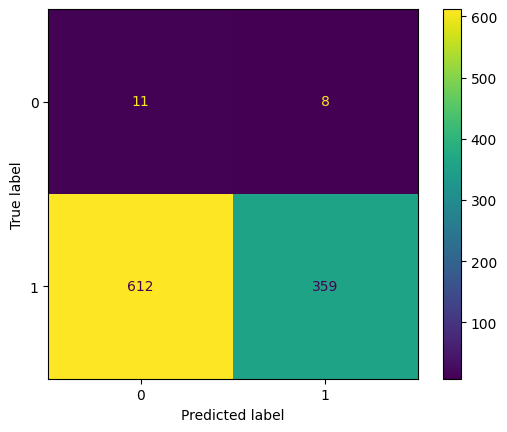



dwoancrel Ratio:  0.01678123736352608
              precision    recall  f1-score   support

         0.0       0.97      0.38      0.54       973
         1.0       0.01      0.41      0.02        17

    accuracy                           0.38       990
   macro avg       0.49      0.39      0.28       990
weighted avg       0.96      0.38      0.53       990



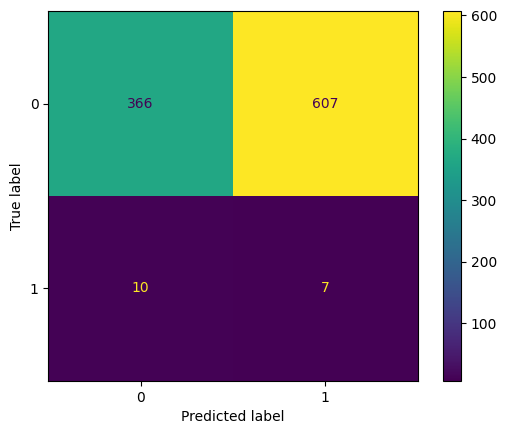



plt Ratio:  0.9458147998382531
              precision    recall  f1-score   support

         0.0       0.04      0.43      0.07        54
         1.0       0.92      0.38      0.53       936

    accuracy                           0.38       990
   macro avg       0.48      0.40      0.30       990
weighted avg       0.87      0.38      0.51       990



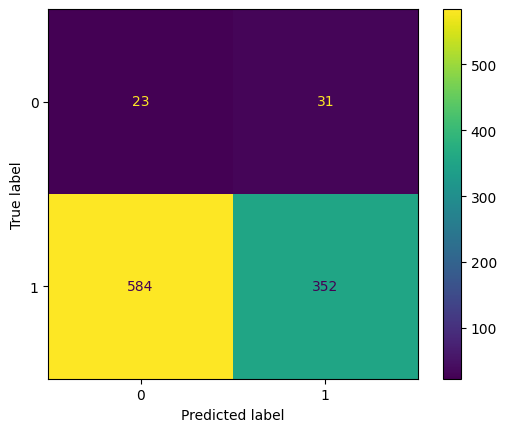



dwoplt Ratio:  0.04892842701172665
              precision    recall  f1-score   support

         0.0       0.97      0.38      0.55       942
         1.0       0.06      0.73      0.11        48

    accuracy                           0.40       990
   macro avg       0.51      0.56      0.33       990
weighted avg       0.92      0.40      0.53       990



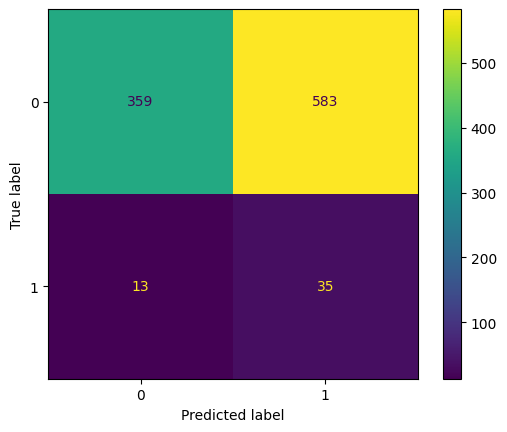



agvhd24 Ratio:  0.3896077638495754
Balanced class, LSAD Model unnecessary.


dwoagvhd24 Ratio:  0.27213910230489285
              precision    recall  f1-score   support

         0.0       0.73      0.39      0.51       721
         1.0       0.27      0.61      0.38       269

    accuracy                           0.45       990
   macro avg       0.50      0.50      0.44       990
weighted avg       0.61      0.45      0.47       990



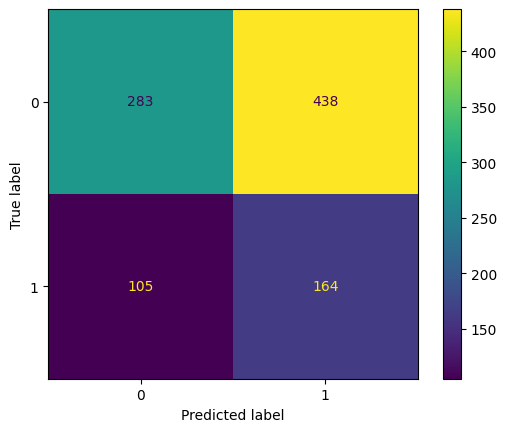



agvhd34 Ratio:  0.14577436312171452
              precision    recall  f1-score   support

         0.0       0.85      0.40      0.54       846
         1.0       0.14      0.59      0.23       144

    accuracy                           0.43       990
   macro avg       0.50      0.49      0.39       990
weighted avg       0.75      0.43      0.50       990



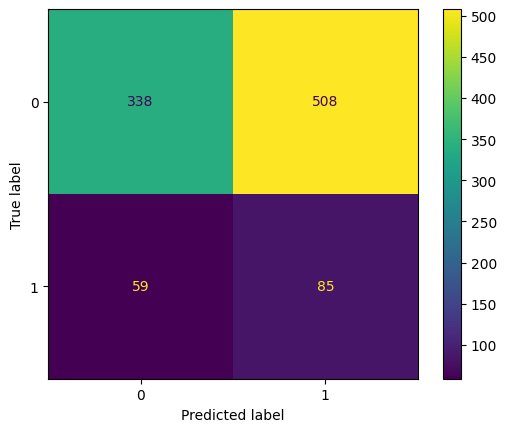



dwoagvhd34 Ratio:  0.39446016983420945
Balanced class, LSAD Model unnecessary.


cgvhd Ratio:  0.48119692680954307
Balanced class, LSAD Model unnecessary.


dwocgvhd Ratio:  0.30752122927618275
Balanced class, LSAD Model unnecessary.


dfs Ratio:  0.625353821269713
Balanced class, LSAD Model unnecessary.


trm Ratio:  0.1957137080469066
              precision    recall  f1-score   support

         0.0       0.82      0.36      0.50       796
         1.0       0.21      0.69      0.32       194

    accuracy                           0.42       990
   macro avg       0.51      0.52      0.41       990
weighted avg       0.70      0.42      0.46       990



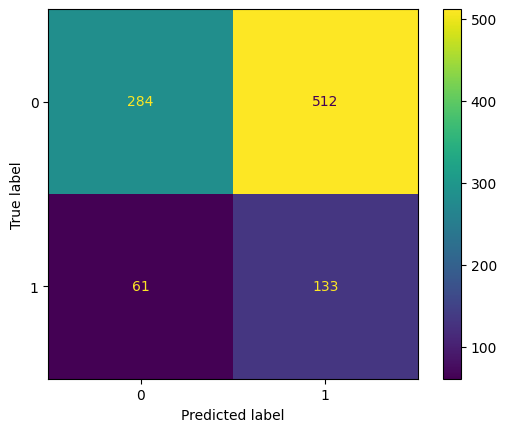



rel Ratio:  0.4284270117266478
Balanced class, LSAD Model unnecessary.


dead Ratio:  0.547513141932875
Balanced class, LSAD Model unnecessary.


pgf Ratio:  0.031540638900121314
              precision    recall  f1-score   support

         0.0       0.96      0.36      0.53       959
         1.0       0.02      0.48      0.05        31

    accuracy                           0.37       990
   macro avg       0.49      0.42      0.29       990
weighted avg       0.93      0.37      0.51       990



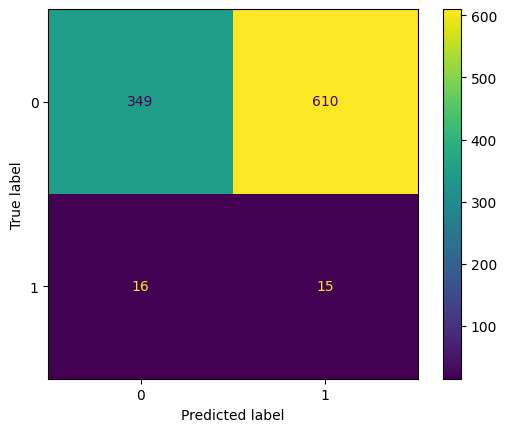

In [23]:
for i in range(len(cols_outcome)):
  outcome = cols_outcome[i] #outcome is the label we are currently running the model on
  y_i=y[outcome] # y_i is the outcome data for the label outcome

  #split our data into X and y
  X_train, X_test, y_train, y_test = train_test_split(X, y_i, test_size = 0.2, random_state = 42, stratify=y_i)

  #checking if this label is balanced or imbalanced
  ratio = y_i.sum() / len(y_i)
  print("\n")
  print(outcome, "Ratio: ", ratio)
  if ratio >= .7:
    inliers  = main_data[main_data[outcome] == 1]
    inliers  = inliers.drop([outcome], axis=1)
    outliers = main_data[main_data[outcome]== 0]
    outliers = outliers.drop([outcome], axis=1)
    inliers_train, inliers_test = train_test_split(inliers, test_size = 0.2, random_state = 42)

    #oversample the data to make up for the imbalance
    sm = SMOTE(sampling_strategy='not minority', random_state=42)
    X_res, y_res = sm.fit_resample(X_train, y_train)
    X_train = X_res
    y_train = y_res

    #run LSAD model
    from lsanomaly import LSAnomaly
    # Create an lsanomaly detector
    detector = LSAnomaly(sigma=3, rho=0.1)
    # Fit the detector to the data
    detector.fit(X_train.to_numpy())
    # Predict
    y_pred = detector.predict(X_test)
    predictions = [1 if i=='anomaly' else 0 for i in y_pred]
    print(classification_report(y_test, predictions))
    cm   = confusion_matrix(y_test, predictions, labels = [0, 1])
    disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [0, 1])
    disp.plot()
    plt.show()
  elif ratio <= .3:
    inliers  = main_data[main_data[outcome] == 0]
    inliers  = inliers.drop([outcome], axis=1)
    outliers = main_data[main_data[outcome]== 1]
    outliers = outliers.drop([outcome], axis=1)
    inliers_train, inliers_test = train_test_split(inliers, test_size = 0.2, random_state = 42)

    #oversample the data to make up for the imbalance
    sm = SMOTE(sampling_strategy='not minority', random_state=42)
    X_res, y_res = sm.fit_resample(X_train, y_train)
    X_train = X_res
    y_train = y_res

    #run LSAD model
    from lsanomaly import LSAnomaly
    # Create an lsanomaly detector
    detector = LSAnomaly(sigma=3, rho=0.1)
    # Fit the detector to the data
    detector.fit(X_train.to_numpy())
    # Predict
    y_pred = detector.predict(X_test)
    predictions = [0 if i=='anomaly' else 1 for i in y_pred]
    print(classification_report(y_test, predictions))
    cm   = confusion_matrix(y_test, predictions, labels = [0, 1])
    disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [0, 1])
    disp.plot()
    plt.show()

  else:
    print("Balanced class, LSAD Model unnecessary.")




## Minimum Covariance Determinant

In [24]:
from sklearn.covariance import MinCovDet

In [25]:
for i in range(len(cols_outcome)):
  outcome = cols_outcome[i] #outcome is the label we are currently running the model on
  y_i=y[outcome] # y_i is the outcome data for the label outcome

  #split our data into X and y
  X_train, X_test, y_train, y_test = train_test_split(X, y_i, test_size = 0.2, random_state = 42, stratify=y_i)

  #checking if this label is balanced or imbalanced
  ratio = y_i.sum() / len(y_i)
  print("\n")
  print(outcome, "Ratio: ", ratio)
  if ratio >= .7:
    inliers  = main_data[main_data[outcome] == 1]
    inliers  = inliers.drop([outcome], axis=1)
    outliers = main_data[main_data[outcome]== 0]
    outliers = outliers.drop([outcome], axis=1)
    inliers_train, inliers_test = train_test_split(inliers, test_size = 0.2, random_state = 42)
    #oversample the data to make up for the imbalance
    sm = SMOTE(sampling_strategy='minority', random_state=42)
    X_res, y_res = sm.fit_resample(X_train, y_train)
    X_train = X_res
    y_train = y_res

    #model
    mcd = MinCovDet(support_fraction=.99)
    mcd.fit(X_train)

    mahal_distances = mcd.mahalanobis(X_test)

    threshold = np.quantile(mahal_distances, 0.975)

    outliers  = np.where(mahal_distances > threshold)[0]
    predictions = [1 if i=='anomaly' else 0 for i in y_pred]
    print(classification_report(y_test, predictions))
  elif ratio <= .3:
    inliers  = main_data[main_data[outcome] == 0]
    inliers  = inliers.drop([outcome], axis=1)
    outliers = main_data[main_data[outcome]== 1]
    outliers = outliers.drop([outcome], axis=1)
    inliers_train, inliers_test = train_test_split(inliers, test_size = 0.2, random_state = 42)
    #oversample the data to make up for the imbalance
    sm = SMOTE(sampling_strategy='minority', random_state=42)
    X_res, y_res = sm.fit_resample(X_train, y_train)
    X_train = X_res
    y_train = y_res

    #model
    mcd = MinCovDet(support_fraction=.99)
    mcd.fit(X_train)

    mahal_distances = mcd.mahalanobis(X_test)

    threshold = np.quantile(mahal_distances, 0.975)

    outliers  = np.where(mahal_distances > threshold)[0]
    predictions = [0 if i=='anomaly' else 1 for i in y_pred]
    print(classification_report(y_test, predictions))
  #if the label is imbalanced, run anomany classification models
  # if ratio >= .7 or ratio <= .3:

  #   #oversample the data to make up for the imbalance
  #   sm = SMOTE(sampling_strategy='minority', random_state=42)
  #   X_res, y_res = sm.fit_resample(X_train, y_train)
  #   X_train = X_res
  #   y_train = y_res

  #   #model
  #   mcd = MinCovDet(support_fraction=.99)
  #   mcd.fit(X_train)

  #   mahal_distances = mcd.mahalanobis(X_test)

  #   threshold = np.quantile(mahal_distances, 0.975)

  #   outliers  = np.where(mahal_distances > threshold)[0]
  #   predictions = [1 if i=='anomaly' else 0 for i in y_pred]
  #   print(classification_report(y_test, predictions))
  else:
    print("Balanced class, MCD Model unnecessary.")




anc Ratio:  0.9811969268095431
              precision    recall  f1-score   support

         0.0       0.03      0.89      0.05        19
         1.0       0.99      0.37      0.54       971

    accuracy                           0.38       990
   macro avg       0.51      0.63      0.30       990
weighted avg       0.98      0.38      0.53       990



dwoancrel Ratio:  0.01678123736352608
              precision    recall  f1-score   support

         0.0       0.97      0.36      0.53       973
         1.0       0.01      0.41      0.02        17

    accuracy                           0.37       990
   macro avg       0.49      0.39      0.28       990
weighted avg       0.96      0.37      0.52       990



plt Ratio:  0.9458147998382531
              precision    recall  f1-score   support

         0.0       0.05      0.63      0.10        54
         1.0       0.95      0.37      0.53       936

    accuracy                           0.38       990
   macro avg       0.5

/usr/local/lib/python3.10/dist-packages/sklearn/covariance/_robust_covariance.py:184: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-33.244347685047615 > -44.176576291938240). You may want to try with a higher value of support_fraction (current value: 0.990).
  warnings.warn(


              precision    recall  f1-score   support

         0.0       0.79      0.36      0.50       796
         1.0       0.19      0.61      0.29       194

    accuracy                           0.41       990
   macro avg       0.49      0.49      0.40       990
weighted avg       0.68      0.41      0.46       990



rel Ratio:  0.4284270117266478
Balanced class, MCD Model unnecessary.


dead Ratio:  0.547513141932875
Balanced class, MCD Model unnecessary.


pgf Ratio:  0.031540638900121314
              precision    recall  f1-score   support

         0.0       0.96      0.36      0.53       959
         1.0       0.02      0.48      0.05        31

    accuracy                           0.37       990
   macro avg       0.49      0.42      0.29       990
weighted avg       0.93      0.37      0.51       990



# Normal Classification Models

##  Logistic Regression model development

In [26]:
from sklearn.multioutput import MultiOutputClassifier
from   sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay




anc Ratio:  0.9811969268095431


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:425: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")


              precision    recall  f1-score   support

         0.0       0.03      0.58      0.05        19
         1.0       0.99      0.60      0.74       971

    accuracy                           0.60       990
   macro avg       0.51      0.59      0.40       990
weighted avg       0.97      0.60      0.73       990



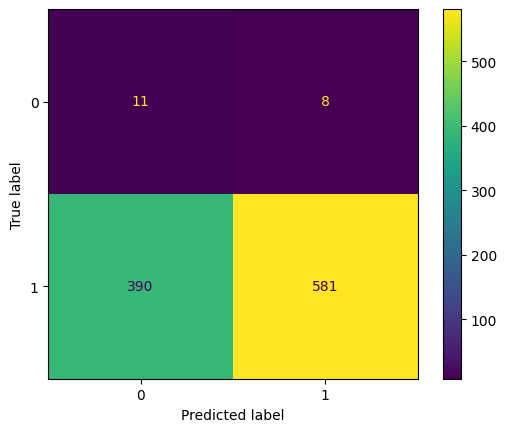



dwoancrel Ratio:  0.01678123736352608


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:425: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")


              precision    recall  f1-score   support

         0.0       0.99      0.60      0.75       973
         1.0       0.02      0.53      0.04        17

    accuracy                           0.60       990
   macro avg       0.50      0.56      0.39       990
weighted avg       0.97      0.60      0.73       990



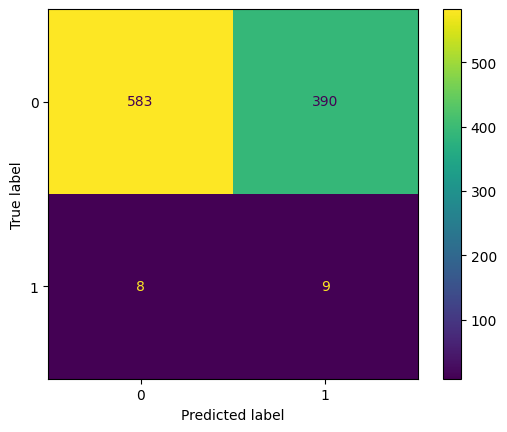



plt Ratio:  0.9458147998382531


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:425: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")


              precision    recall  f1-score   support

         0.0       0.07      0.46      0.12        54
         1.0       0.95      0.62      0.75       936

    accuracy                           0.62       990
   macro avg       0.51      0.54      0.44       990
weighted avg       0.90      0.62      0.72       990



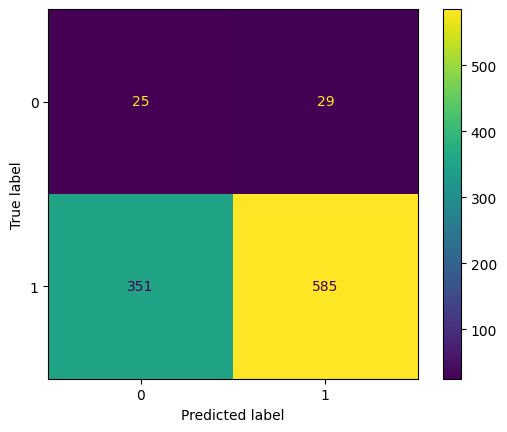



dwoplt Ratio:  0.04892842701172665


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")


              precision    recall  f1-score   support

         0.0       0.97      0.60      0.74       942
         1.0       0.07      0.58      0.12        48

    accuracy                           0.60       990
   macro avg       0.52      0.59      0.43       990
weighted avg       0.92      0.60      0.71       990



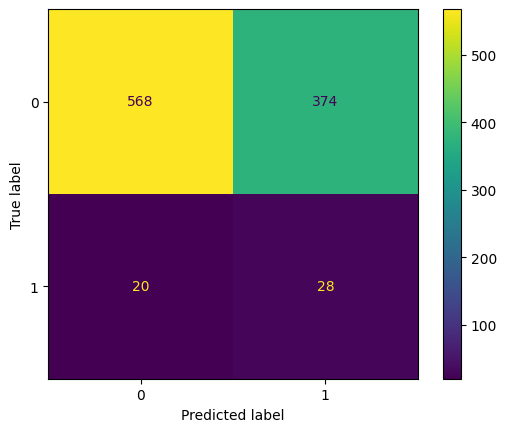



agvhd24 Ratio:  0.3896077638495754


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:425: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")


              precision    recall  f1-score   support

         0.0       0.62      0.93      0.74       604
         1.0       0.50      0.11      0.19       386

    accuracy                           0.61       990
   macro avg       0.56      0.52      0.46       990
weighted avg       0.57      0.61      0.53       990



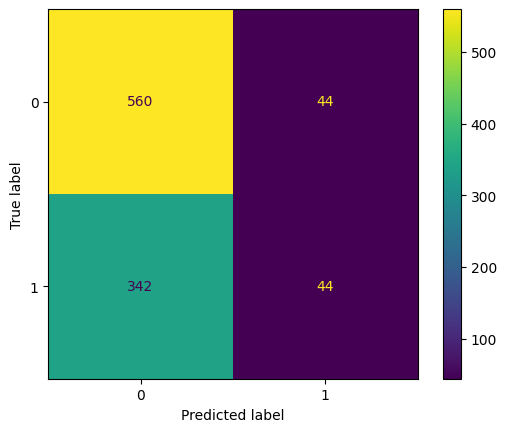



dwoagvhd24 Ratio:  0.27213910230489285


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")


              precision    recall  f1-score   support

         0.0       0.77      0.55      0.65       721
         1.0       0.32      0.56      0.41       269

    accuracy                           0.56       990
   macro avg       0.54      0.56      0.53       990
weighted avg       0.65      0.56      0.58       990



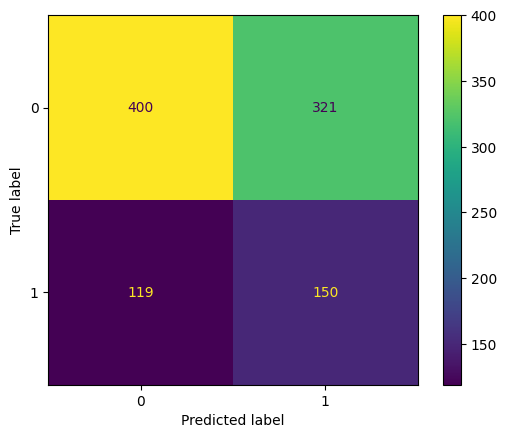



agvhd34 Ratio:  0.14577436312171452


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:425: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")


              precision    recall  f1-score   support

         0.0       0.89      0.57      0.70       846
         1.0       0.19      0.57      0.28       144

    accuracy                           0.57       990
   macro avg       0.54      0.57      0.49       990
weighted avg       0.78      0.57      0.64       990



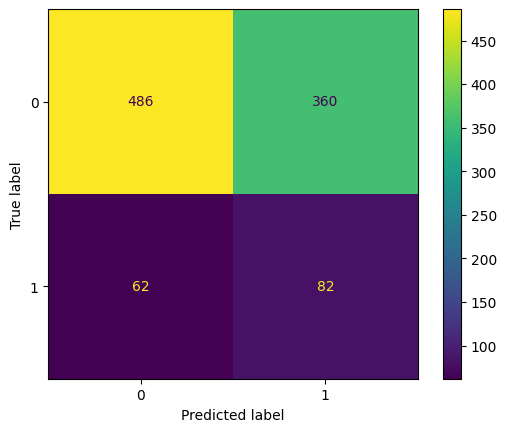



dwoagvhd34 Ratio:  0.39446016983420945


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:425: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")


              precision    recall  f1-score   support

         0.0       0.62      0.86      0.72       599
         1.0       0.48      0.19      0.28       391

    accuracy                           0.60       990
   macro avg       0.55      0.53      0.50       990
weighted avg       0.56      0.60      0.55       990



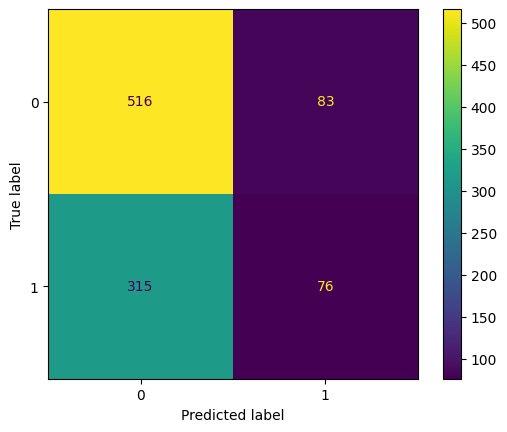



cgvhd Ratio:  0.48119692680954307


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:425: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")


              precision    recall  f1-score   support

         0.0       0.58      0.55      0.57       514
         1.0       0.54      0.58      0.56       476

    accuracy                           0.56       990
   macro avg       0.56      0.56      0.56       990
weighted avg       0.56      0.56      0.56       990



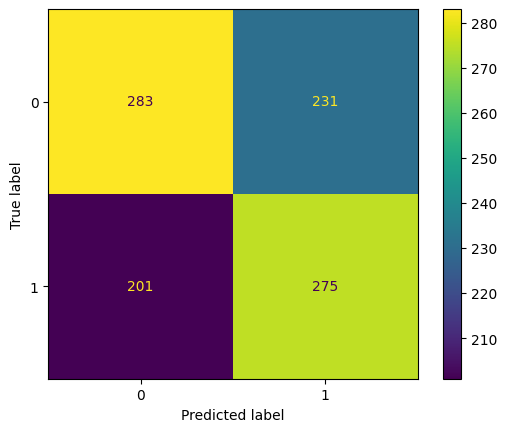



dwocgvhd Ratio:  0.30752122927618275


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")


              precision    recall  f1-score   support

         0.0       0.70      0.99      0.82       686
         1.0       0.68      0.06      0.10       304

    accuracy                           0.70       990
   macro avg       0.69      0.52      0.46       990
weighted avg       0.70      0.70      0.60       990



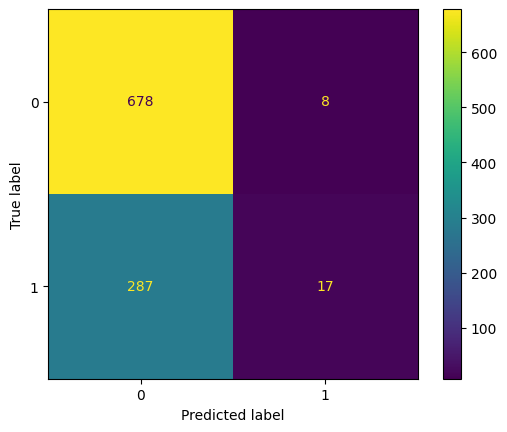



dfs Ratio:  0.625353821269713


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:425: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")


              precision    recall  f1-score   support

         0.0       0.56      0.18      0.27       371
         1.0       0.65      0.92      0.76       619

    accuracy                           0.64       990
   macro avg       0.60      0.55      0.51       990
weighted avg       0.61      0.64      0.58       990



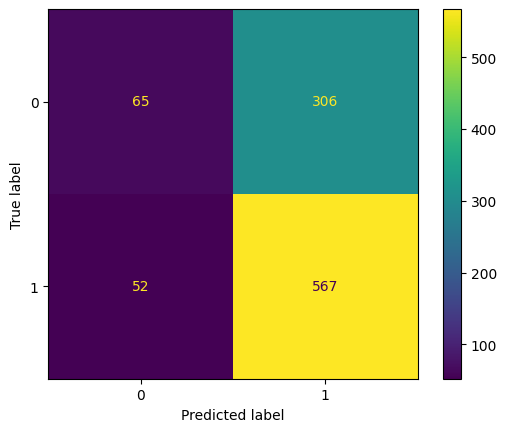



trm Ratio:  0.1957137080469066


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:425: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")


              precision    recall  f1-score   support

         0.0       0.87      0.58      0.70       796
         1.0       0.27      0.64      0.38       194

    accuracy                           0.59       990
   macro avg       0.57      0.61      0.54       990
weighted avg       0.75      0.59      0.63       990



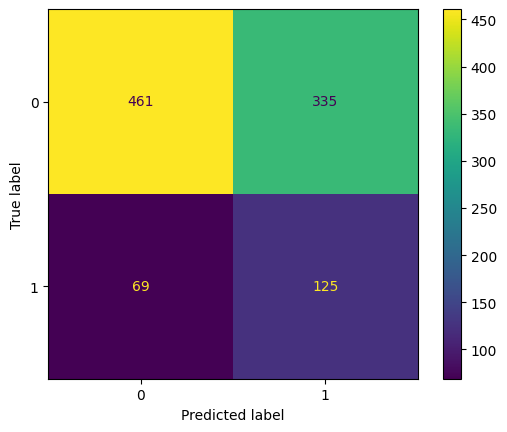



rel Ratio:  0.4284270117266478


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:425: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")


              precision    recall  f1-score   support

         0.0       0.60      0.87      0.71       566
         1.0       0.55      0.22      0.31       424

    accuracy                           0.59       990
   macro avg       0.57      0.54      0.51       990
weighted avg       0.58      0.59      0.54       990



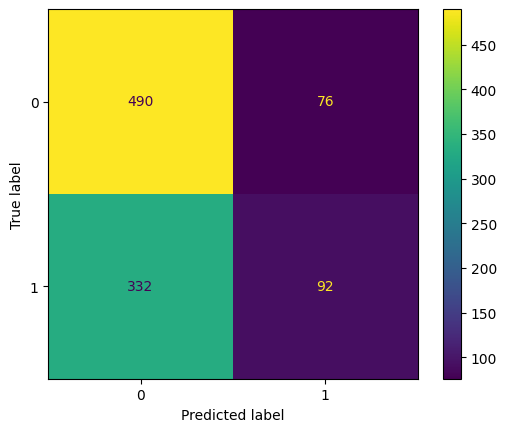



dead Ratio:  0.547513141932875


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:425: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")


              precision    recall  f1-score   support

         0.0       0.56      0.39      0.46       448
         1.0       0.60      0.75      0.66       542

    accuracy                           0.58       990
   macro avg       0.58      0.57      0.56       990
weighted avg       0.58      0.58      0.57       990



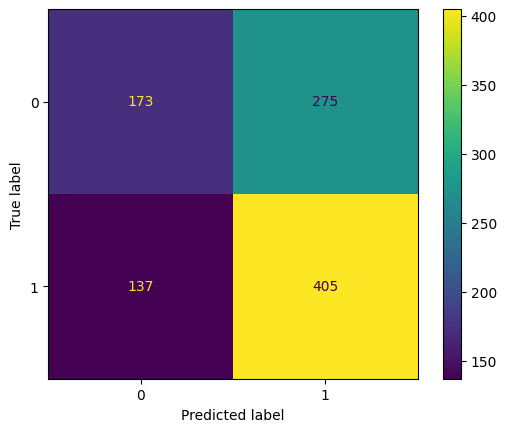



pgf Ratio:  0.031540638900121314


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:425: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")


              precision    recall  f1-score   support

         0.0       0.98      0.66      0.79       959
         1.0       0.04      0.48      0.08        31

    accuracy                           0.66       990
   macro avg       0.51      0.57      0.44       990
weighted avg       0.95      0.66      0.77       990



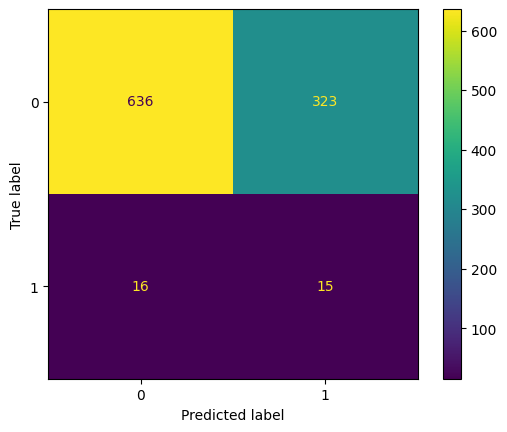

In [27]:
for i in range(len(cols_outcome)):
  outcome = cols_outcome[i] #outcome is the label we are currently running the model on
  y_i=y[outcome] # y_i is the outcome data for the label outcome

  #split our data into X and y
  X_train, X_test, y_train, y_test = train_test_split(X, y_i, test_size = 0.2, random_state = 42, stratify=y_i)

  #checking if this label is balanced or imbalanced
  ratio = y_i.sum() / len(y_i)
  print("\n")
  print(outcome, "Ratio: ", ratio)
  if ratio >= .7:
    inliers  = main_data[main_data[outcome] == 1]
    inliers  = inliers.drop([outcome], axis=1)
    outliers = main_data[main_data[outcome]== 0]
    outliers = outliers.drop([outcome], axis=1)
    inliers_train, inliers_test = train_test_split(inliers, test_size = 0.2, random_state = 42)
  elif ratio <= .3:
    inliers  = main_data[main_data[outcome] == 0]
    inliers  = inliers.drop([outcome], axis=1)
    outliers = main_data[main_data[outcome]== 1]
    outliers = outliers.drop([outcome], axis=1)
    inliers_train, inliers_test = train_test_split(inliers, test_size = 0.2, random_state = 42)

  #if the label is imbalanced, run anomany classification models
  if ratio >= .7 or ratio <= .3:

    #oversample the data to make up for the imbalance
    sm = SMOTE(sampling_strategy='minority', random_state=42)
    X_res, y_res = sm.fit_resample(X_train, y_train)
    X_train = X_res
    y_train = y_res

  #model
  logistic_model    = LogisticRegression(solver='newton-cg').fit(X_train, y_train)
  predictions       = logistic_model.predict(X_test) # 1/0
  predictions_proba = logistic_model.predict_proba(X_test) # proba for 1/positive class
  print(classification_report(y_test, predictions))
  cm   = confusion_matrix(y_test, predictions, labels = [0, 1])
  disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [0, 1])
  disp.plot()
  plt.show()


##Random Forest Classifier



anc Ratio:  0.9811969268095431


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        19
         1.0       0.98      1.00      0.99       971

    accuracy                           0.98       990
   macro avg       0.49      0.50      0.50       990
weighted avg       0.96      0.98      0.97       990



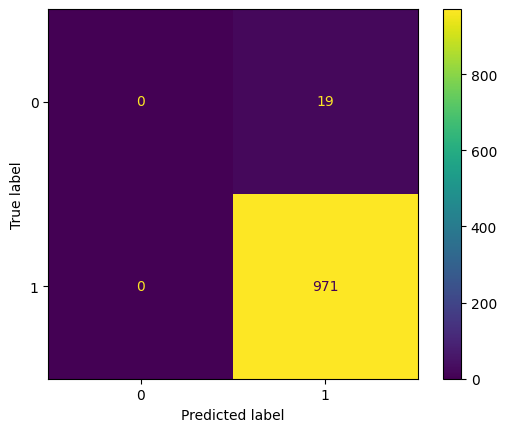

Most significant features:
drabomatch    1.000000
karnofcat     0.941077
hctcigp2      0.854255
drcmvpr       0.785880
dis           0.739378
hctcigp       0.686652
dtype: float64


dwoancrel Ratio:  0.01678123736352608


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99       973
         1.0       0.00      0.00      0.00        17

    accuracy                           0.98       990
   macro avg       0.49      0.50      0.50       990
weighted avg       0.97      0.98      0.97       990



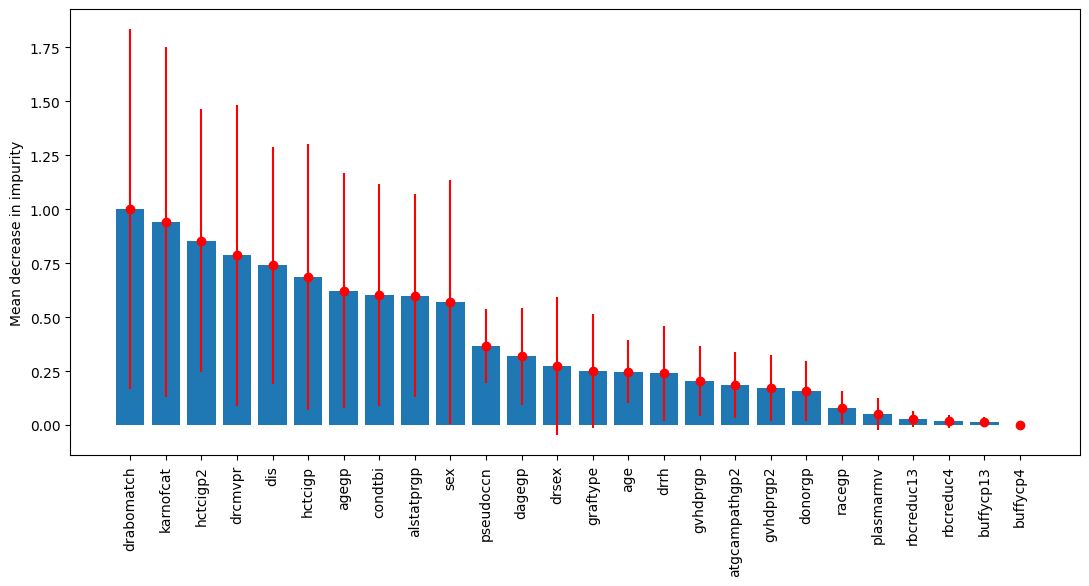

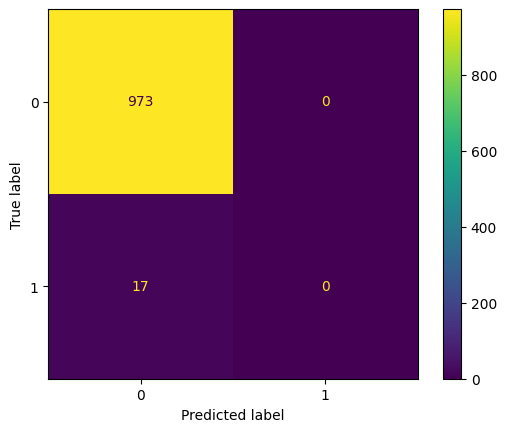

Most significant features:
karnofcat     1.000000
drabomatch    0.799099
drcmvpr       0.762085
alstatprgp    0.715575
hctcigp2      0.696740
hctcigp       0.570595
dtype: float64


plt Ratio:  0.9458147998382531
              precision    recall  f1-score   support

         0.0       0.25      0.02      0.03        54
         1.0       0.95      1.00      0.97       936

    accuracy                           0.94       990
   macro avg       0.60      0.51      0.50       990
weighted avg       0.91      0.94      0.92       990



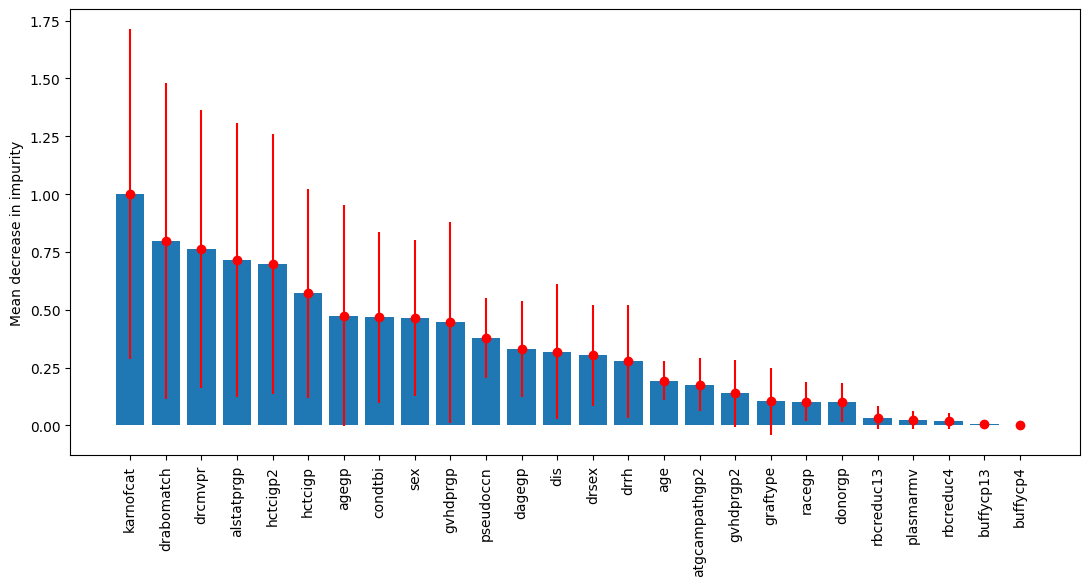

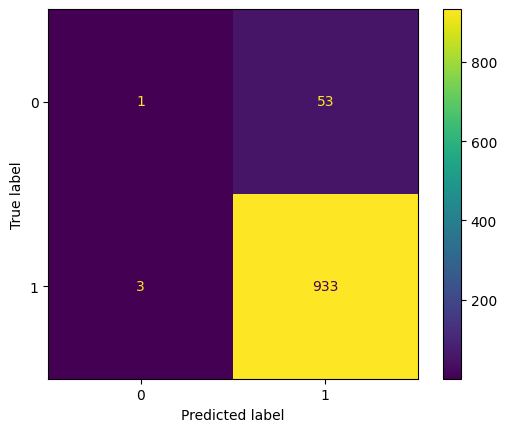

Most significant features:
karnofcat     1.000000
drabomatch    0.902667
alstatprgp    0.724446
sex           0.552619
dis           0.552237
dagegp        0.507648
dtype: float64


dwoplt Ratio:  0.04892842701172665
              precision    recall  f1-score   support

         0.0       0.95      1.00      0.98       942
         1.0       0.50      0.02      0.04        48

    accuracy                           0.95       990
   macro avg       0.73      0.51      0.51       990
weighted avg       0.93      0.95      0.93       990



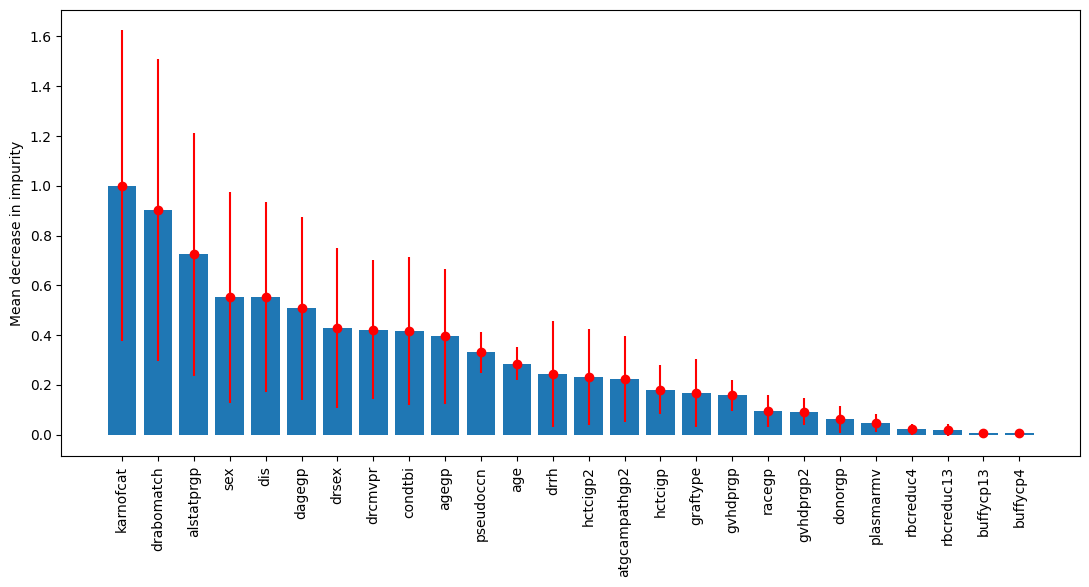

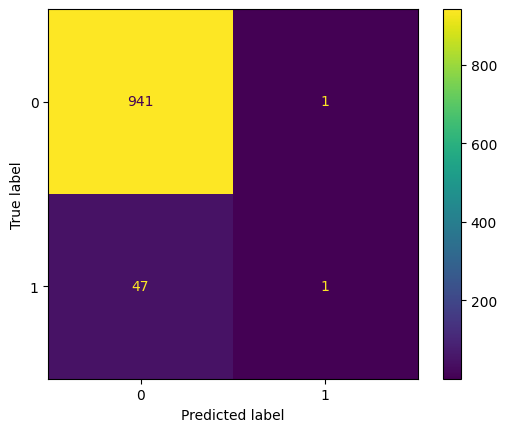

Most significant features:
karnofcat     1.000000
alstatprgp    0.674533
drabomatch    0.640247
sex           0.427922
dis           0.415449
drsex         0.380328
dtype: float64


agvhd24 Ratio:  0.3896077638495754
              precision    recall  f1-score   support

         0.0       0.63      0.83      0.72       604
         1.0       0.48      0.24      0.32       386

    accuracy                           0.60       990
   macro avg       0.55      0.54      0.52       990
weighted avg       0.57      0.60      0.56       990



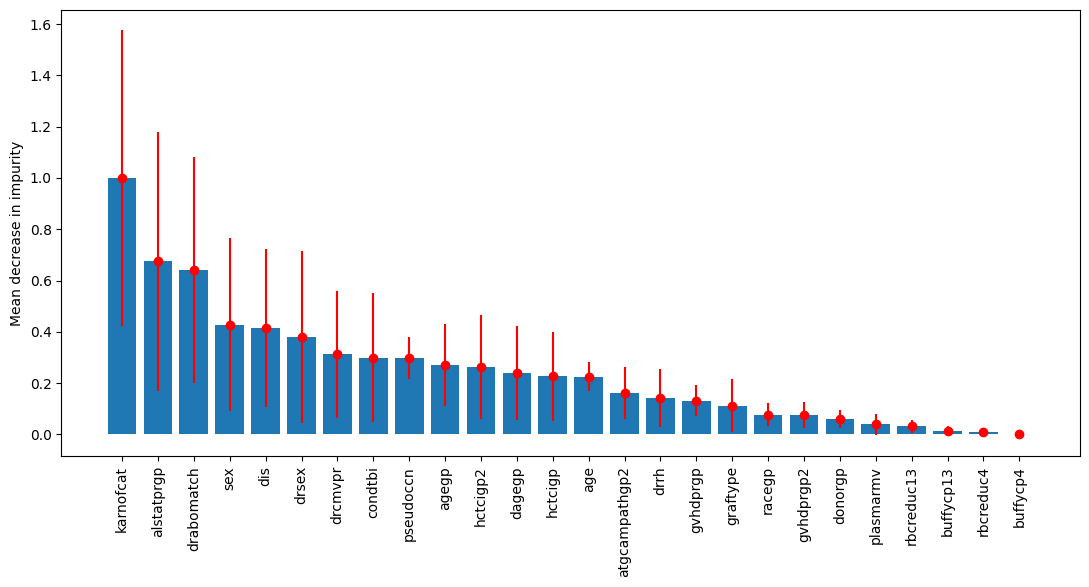

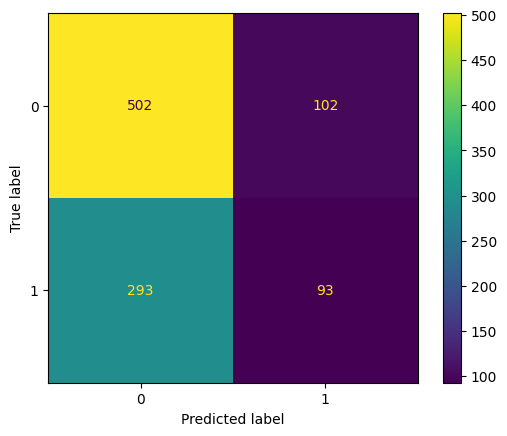

Most significant features:
age           1.000000
pseudoccn     0.843538
drcmvpr       0.333471
alstatprgp    0.295278
gvhdprgp      0.292326
drabomatch    0.290154
dtype: float64


dwoagvhd24 Ratio:  0.27213910230489285
              precision    recall  f1-score   support

         0.0       0.74      0.95      0.83       721
         1.0       0.39      0.08      0.13       269

    accuracy                           0.72       990
   macro avg       0.56      0.52      0.48       990
weighted avg       0.64      0.72      0.64       990



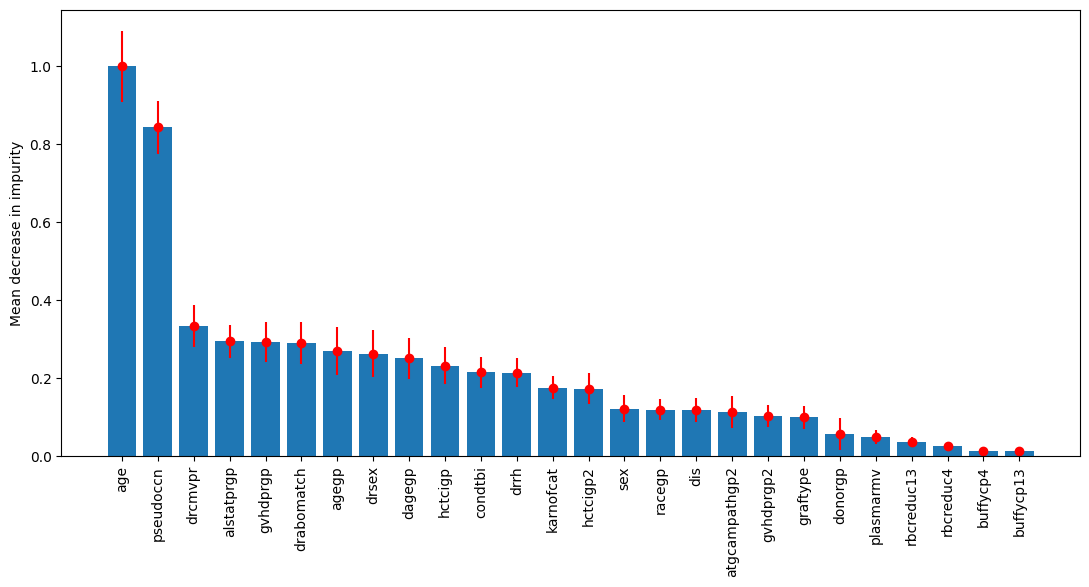

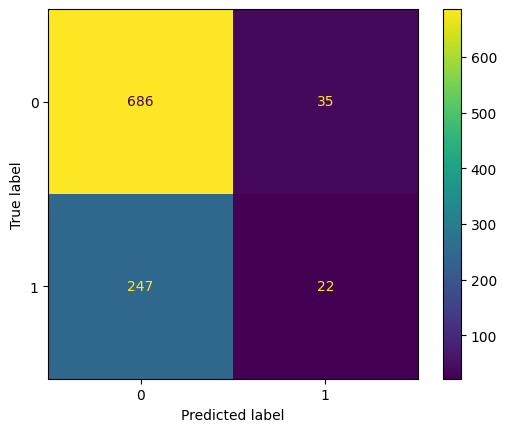

Most significant features:
age           1.000000
pseudoccn     0.824449
agegp         0.628254
karnofcat     0.583538
drabomatch    0.489980
alstatprgp    0.484930
dtype: float64


agvhd34 Ratio:  0.14577436312171452
              precision    recall  f1-score   support

         0.0       0.85      0.99      0.92       846
         1.0       0.14      0.01      0.01       144

    accuracy                           0.85       990
   macro avg       0.50      0.50      0.47       990
weighted avg       0.75      0.85      0.79       990



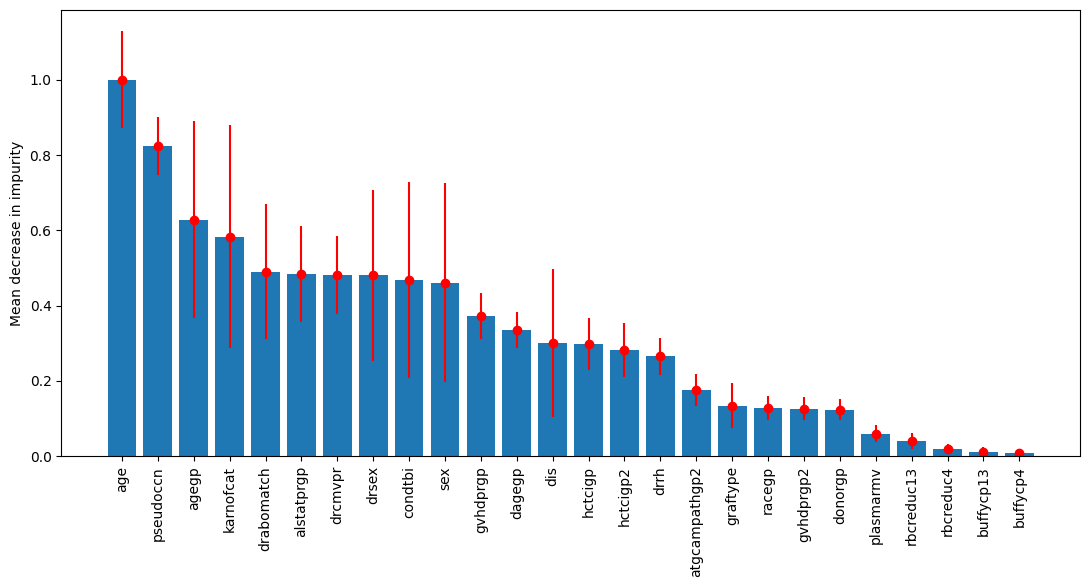

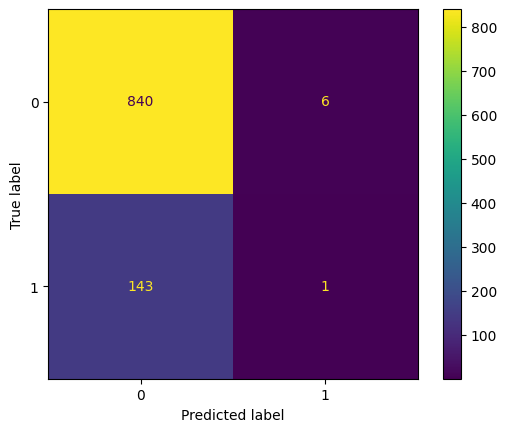

Most significant features:
sex          1.000000
drsex        0.738888
condtbi      0.735900
age          0.679735
karnofcat    0.671119
pseudoccn    0.655213
dtype: float64


dwoagvhd34 Ratio:  0.39446016983420945
              precision    recall  f1-score   support

         0.0       0.62      0.78      0.69       599
         1.0       0.43      0.26      0.32       391

    accuracy                           0.57       990
   macro avg       0.52      0.52      0.50       990
weighted avg       0.54      0.57      0.54       990



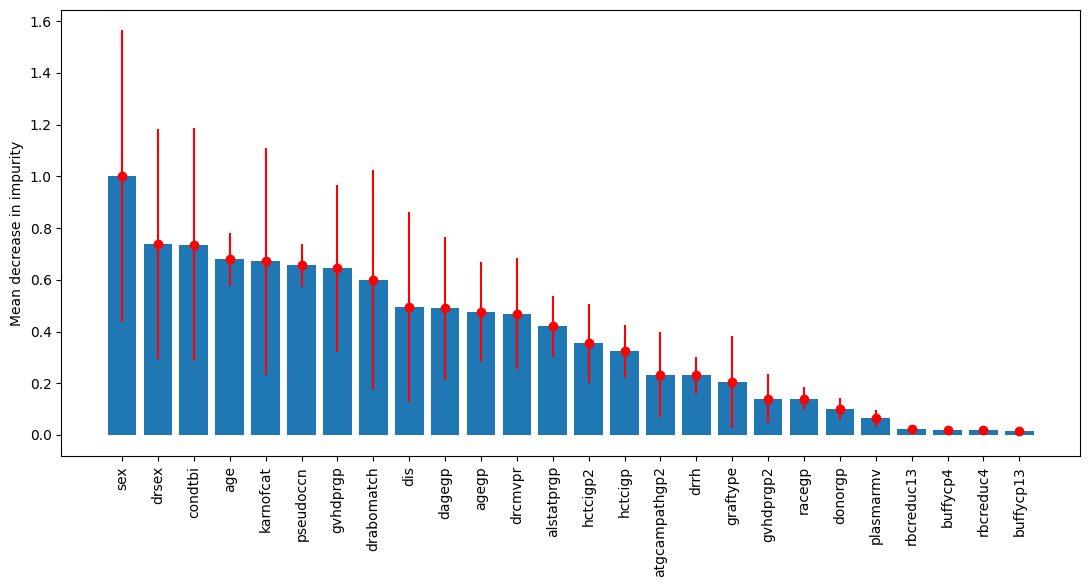

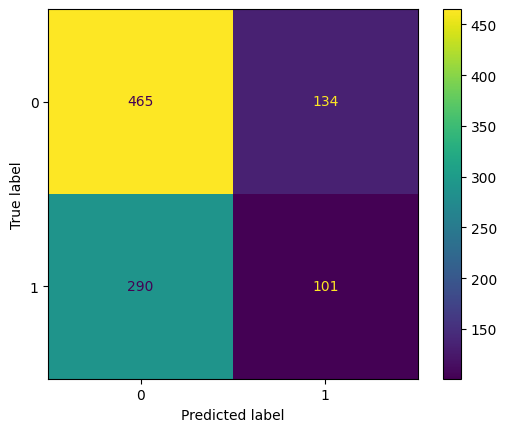

Most significant features:
age           1.000000
pseudoccn     0.773861
drcmvpr       0.327287
alstatprgp    0.320510
gvhdprgp      0.286477
dagegp        0.276585
dtype: float64


cgvhd Ratio:  0.48119692680954307
              precision    recall  f1-score   support

         0.0       0.57      0.59      0.58       514
         1.0       0.54      0.52      0.53       476

    accuracy                           0.55       990
   macro avg       0.55      0.55      0.55       990
weighted avg       0.55      0.55      0.55       990



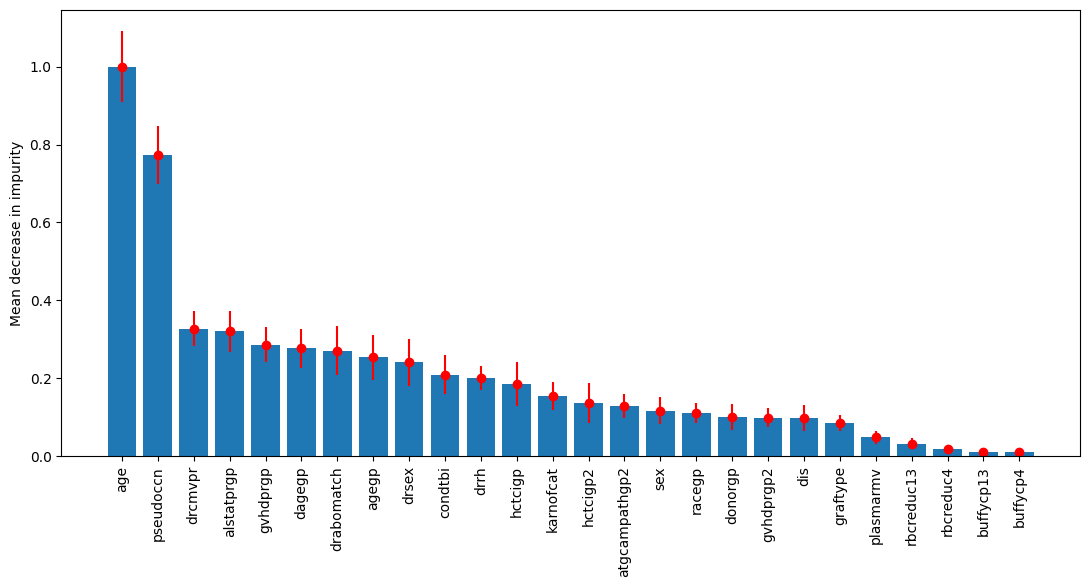

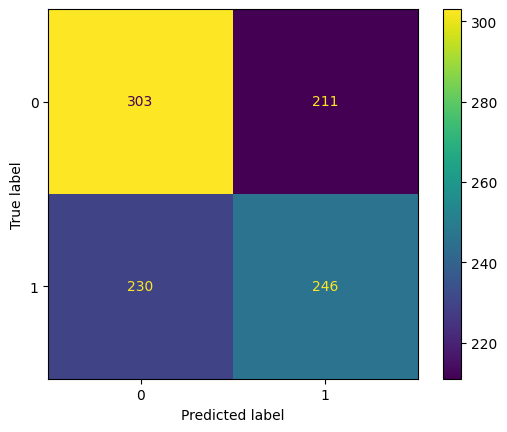

Most significant features:
age           1.000000
pseudoccn     0.836669
drcmvpr       0.353139
alstatprgp    0.317716
agegp         0.309481
dagegp        0.295153
dtype: float64


dwocgvhd Ratio:  0.30752122927618275
              precision    recall  f1-score   support

         0.0       0.71      0.92      0.81       686
         1.0       0.50      0.17      0.25       304

    accuracy                           0.69       990
   macro avg       0.60      0.55      0.53       990
weighted avg       0.65      0.69      0.64       990



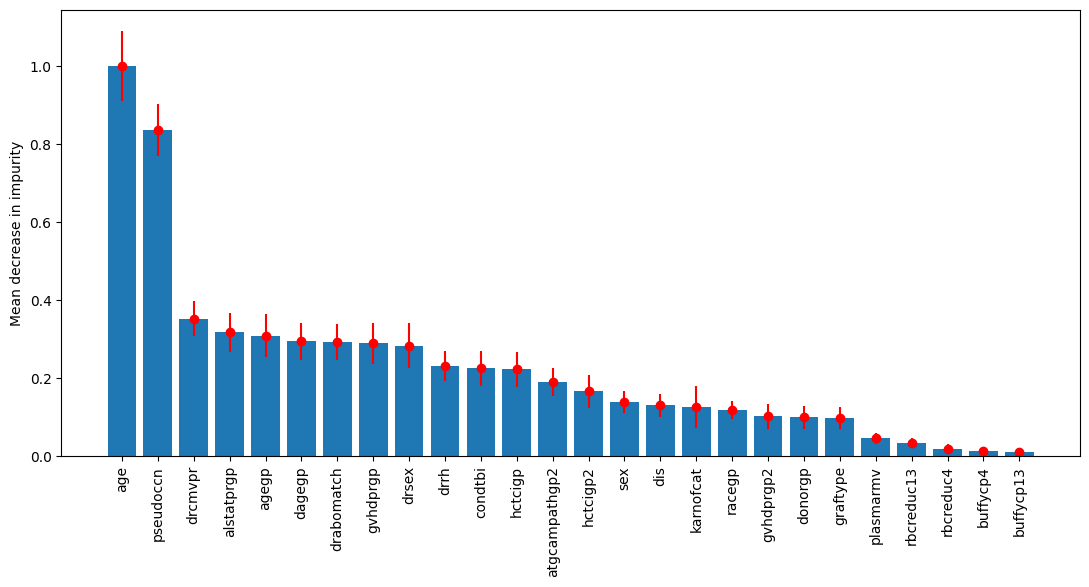

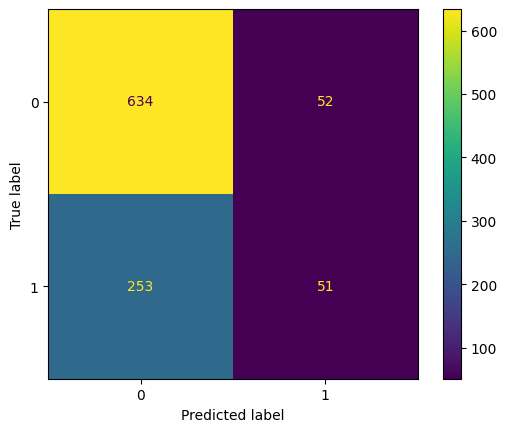

Most significant features:
age           1.000000
pseudoccn     0.790956
alstatprgp    0.384819
drcmvpr       0.332677
gvhdprgp      0.295326
dagegp        0.291381
dtype: float64


dfs Ratio:  0.625353821269713
              precision    recall  f1-score   support

         0.0       0.45      0.28      0.35       371
         1.0       0.65      0.79      0.71       619

    accuracy                           0.60       990
   macro avg       0.55      0.54      0.53       990
weighted avg       0.58      0.60      0.58       990



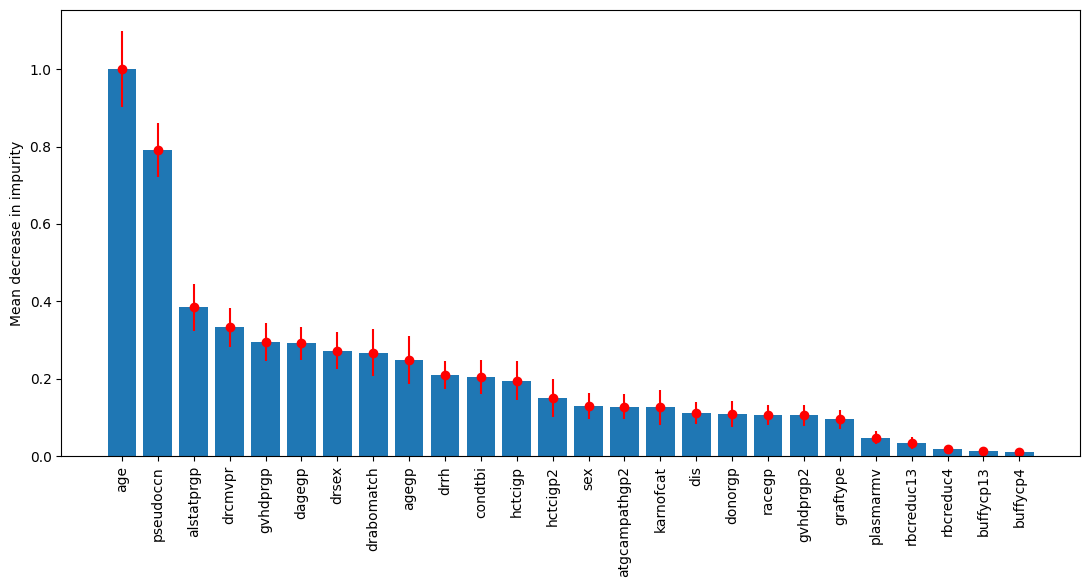

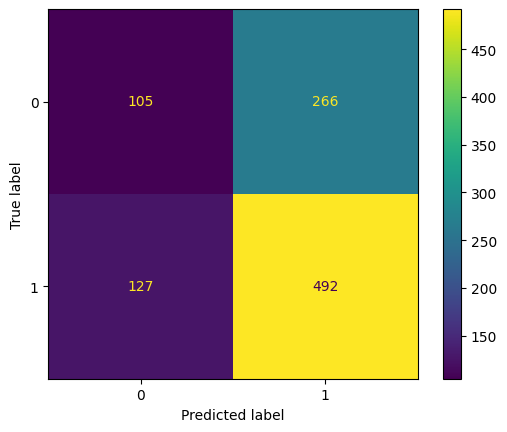

Most significant features:
age           1.000000
pseudoccn     0.762793
alstatprgp    0.373305
drcmvpr       0.323828
gvhdprgp      0.282630
dagegp        0.277209
dtype: float64


trm Ratio:  0.1957137080469066
              precision    recall  f1-score   support

         0.0       0.81      0.98      0.89       796
         1.0       0.33      0.04      0.07       194

    accuracy                           0.80       990
   macro avg       0.57      0.51      0.48       990
weighted avg       0.71      0.80      0.73       990



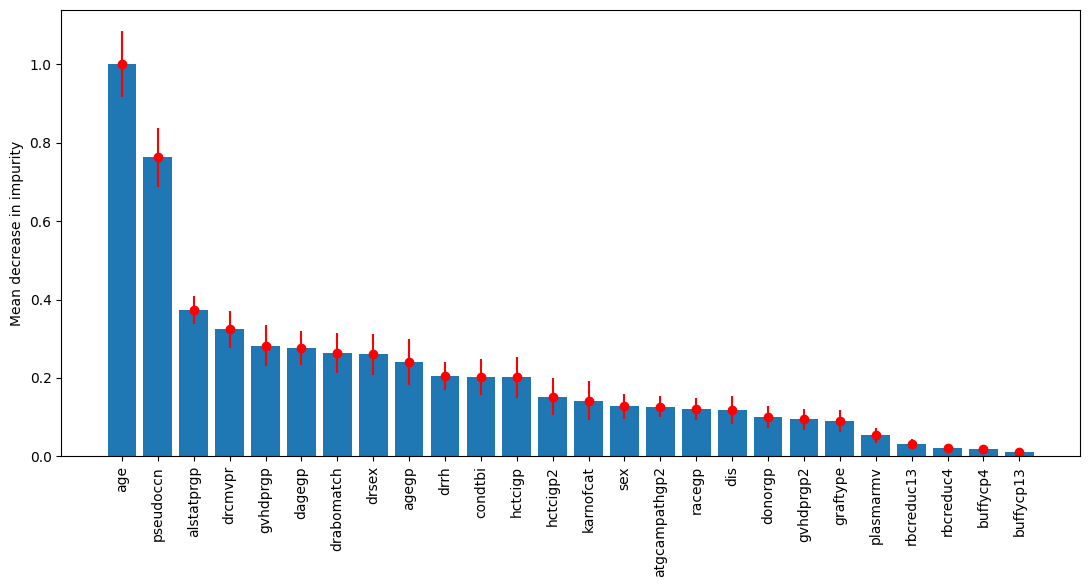

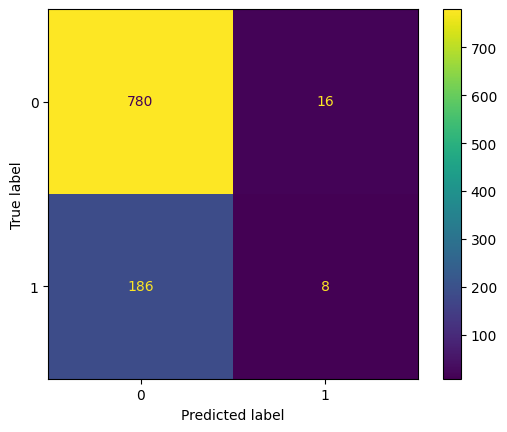

Most significant features:
age           1.000000
pseudoccn     0.840616
karnofcat     0.791496
sex           0.762577
agegp         0.732804
drabomatch    0.648168
dtype: float64


rel Ratio:  0.4284270117266478
              precision    recall  f1-score   support

         0.0       0.63      0.78      0.70       566
         1.0       0.57      0.38      0.46       424

    accuracy                           0.61       990
   macro avg       0.60      0.58      0.58       990
weighted avg       0.60      0.61      0.59       990



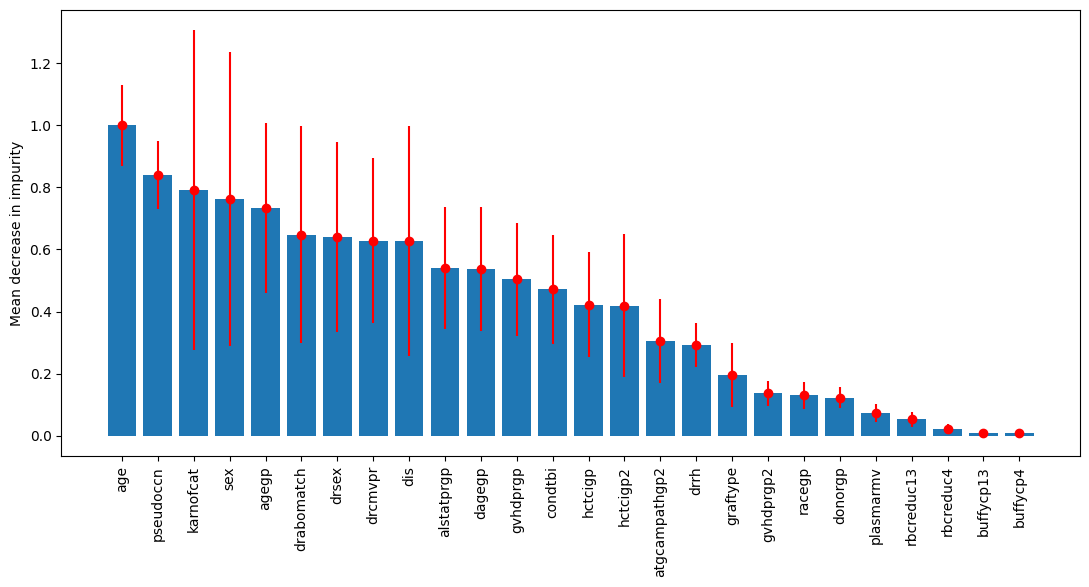

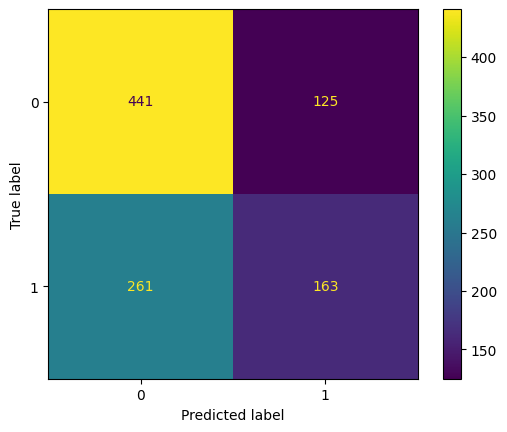

Most significant features:
age           1.000000
pseudoccn     0.797488
alstatprgp    0.444627
drcmvpr       0.329468
gvhdprgp      0.295035
drabomatch    0.284917
dtype: float64


dead Ratio:  0.547513141932875
              precision    recall  f1-score   support

         0.0       0.56      0.51      0.54       448
         1.0       0.62      0.67      0.64       542

    accuracy                           0.60       990
   macro avg       0.59      0.59      0.59       990
weighted avg       0.59      0.60      0.59       990



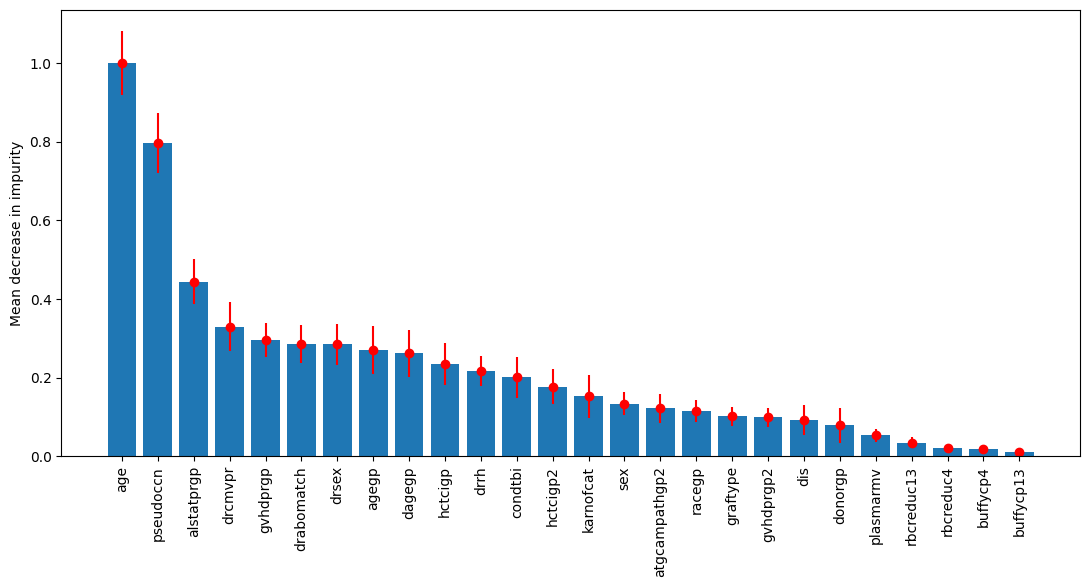

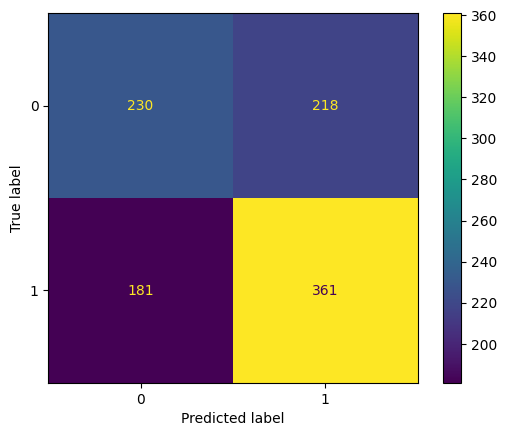

Most significant features:
age           1.000000
pseudoccn     0.773434
alstatprgp    0.359851
drcmvpr       0.320187
dagegp        0.292307
gvhdprgp      0.271914
dtype: float64


pgf Ratio:  0.031540638900121314


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

         0.0       0.97      1.00      0.98       959
         1.0       0.00      0.00      0.00        31

    accuracy                           0.97       990
   macro avg       0.48      0.50      0.49       990
weighted avg       0.94      0.97      0.95       990



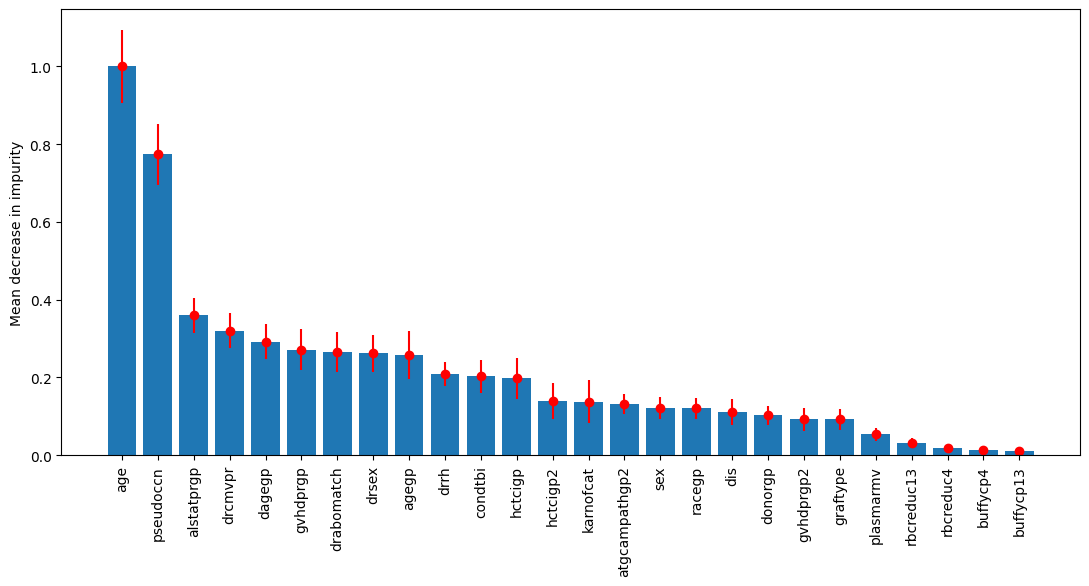

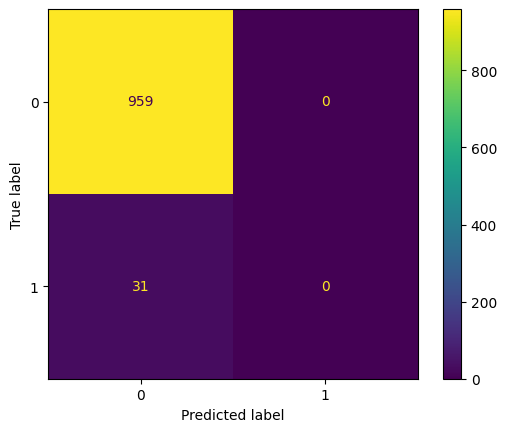

Most significant features:
sex           1.000000
drcmvpr       0.979538
drabomatch    0.967781
karnofcat     0.891359
graftype      0.757709
dis           0.738758
dtype: float64


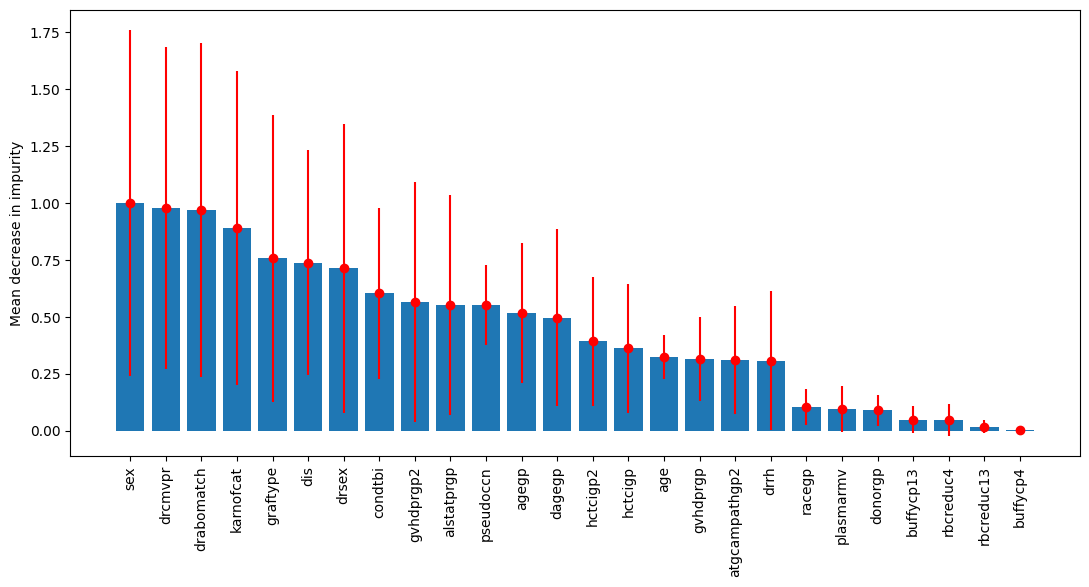

In [28]:
for i in range(len(cols_outcome)):
  outcome = cols_outcome[i] #outcome is the label we are currently running the model on
  y_i=y[outcome] # y_i is the outcome data for the label outcome

  #split our data into X and y
  X_train, X_test, y_train, y_test = train_test_split(X, y_i, test_size = 0.2, random_state = 42, stratify=y_i)

  #checking if this label is balanced or imbalanced
  ratio = y_i.sum() / len(y_i)
  print("\n")
  print(outcome, "Ratio: ", ratio)
  if ratio >= .7:
    inliers  = main_data[main_data[outcome] == 1]
    inliers  = inliers.drop([outcome], axis=1)
    outliers = main_data[main_data[outcome]== 0]
    outliers = outliers.drop([outcome], axis=1)
    inliers_train, inliers_test = train_test_split(inliers, test_size = 0.2, random_state = 42)
  elif ratio <= .3:
    inliers  = main_data[main_data[outcome] == 0]
    inliers  = inliers.drop([outcome], axis=1)
    outliers = main_data[main_data[outcome]== 1]
    outliers = outliers.drop([outcome], axis=1)
    inliers_train, inliers_test = train_test_split(inliers, test_size = 0.2, random_state = 42)

  #if the label is imbalanced, run anomany classification models
  if ratio >= .7 or ratio <= .3:

    #oversample the data to make up for the imbalance
    sm = SMOTE(sampling_strategy='minority', random_state=42)
    X_res, y_res = sm.fit_resample(X_train, y_train)
    X_train = X_res
    y_train = y_res

  #model
  clf               = RandomForestClassifier().fit(X_train, y_train)
  predictions       = clf.predict(X_test) # 1/0
  predictions_proba = clf.predict_proba(X_test) # proba for 1/positive class

  print(classification_report(y_test, predictions))
  cm   = confusion_matrix(y_test, predictions, labels = [0, 1])
  disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [0, 1])
  disp.plot()
  plt.show()

  feature_names      = [col for col in main_data.columns if col not in cols_drop]
  importances        = clf.feature_importances_
  std                = np.std([tree.feature_importances_ for tree in clf.estimators_], axis=0)
  forest_importances = pd.Series(importances, index=feature_names)
  forest_importances = forest_importances/max(importances)
  std                = std/max(importances)

  # reorder importance values in decreasing order
  sorted_indices     = np.argsort(forest_importances)[::-1]
  forest_importances = forest_importances[sorted_indices]
  std                = std[sorted_indices]

  fig, ax = plt.subplots(figsize = (11, 5))

  # forest_importances.plot.bar(yerr=std, ax = ax)

  plt.bar(np.arange(len(importances)), forest_importances)
  plt.errorbar(np.arange(len(importances)), forest_importances, yerr=std, fmt="o", color="r")

  ax.set_ylabel("Mean decrease in impurity")
  fig.tight_layout()
  plt.xticks(np.arange(len(feature_names)))
  ax.set_xticklabels(forest_importances.index.tolist(), rotation = 90)

  most_significant_features = forest_importances.nlargest(6)  # Change '6' to the desired number of top features
  print("Most significant features:")
  print(most_significant_features)


## Ridge Classifier Model

In [29]:
from sklearn.linear_model import RidgeClassifier



anc Ratio:  0.9811969268095431
              precision    recall  f1-score   support

         0.0       0.03      0.53      0.05        19
         1.0       0.98      0.60      0.75       971

    accuracy                           0.60       990
   macro avg       0.51      0.56      0.40       990
weighted avg       0.97      0.60      0.73       990



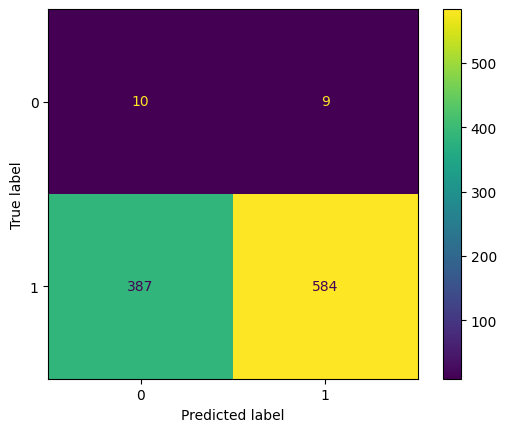



dwoancrel Ratio:  0.01678123736352608
              precision    recall  f1-score   support

         0.0       0.99      0.60      0.74       973
         1.0       0.02      0.53      0.04        17

    accuracy                           0.59       990
   macro avg       0.50      0.56      0.39       990
weighted avg       0.97      0.59      0.73       990



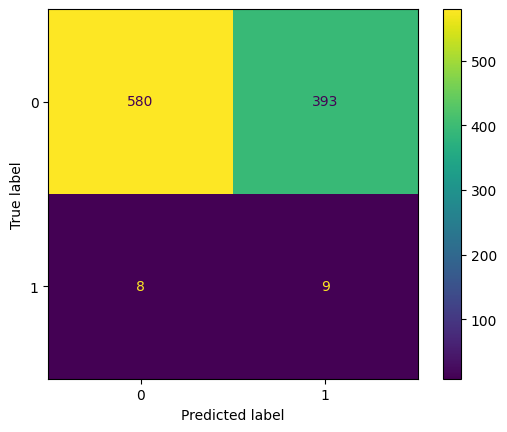



plt Ratio:  0.9458147998382531
              precision    recall  f1-score   support

         0.0       0.06      0.44      0.11        54
         1.0       0.95      0.62      0.75       936

    accuracy                           0.62       990
   macro avg       0.51      0.53      0.43       990
weighted avg       0.90      0.62      0.72       990



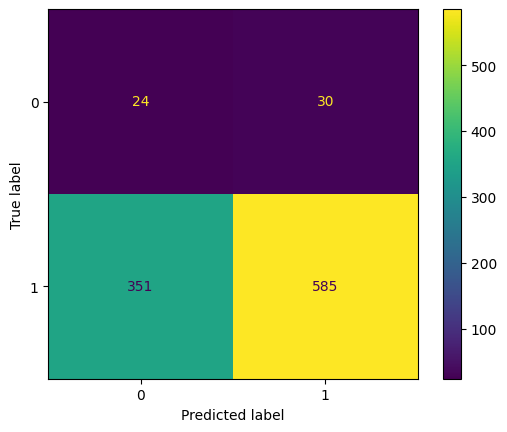



dwoplt Ratio:  0.04892842701172665
              precision    recall  f1-score   support

         0.0       0.97      0.60      0.74       942
         1.0       0.07      0.58      0.12        48

    accuracy                           0.60       990
   macro avg       0.52      0.59      0.43       990
weighted avg       0.92      0.60      0.71       990



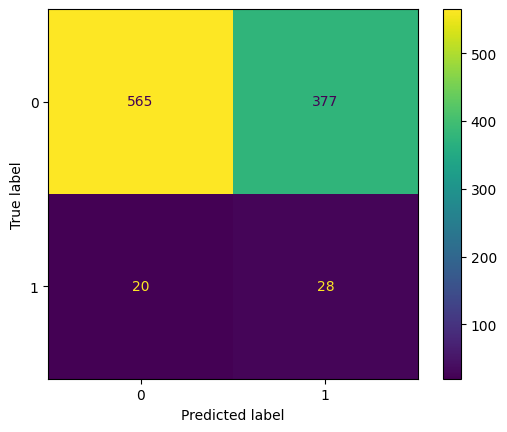



agvhd24 Ratio:  0.3896077638495754
              precision    recall  f1-score   support

         0.0       0.62      0.93      0.74       604
         1.0       0.49      0.11      0.17       386

    accuracy                           0.61       990
   macro avg       0.56      0.52      0.46       990
weighted avg       0.57      0.61      0.52       990



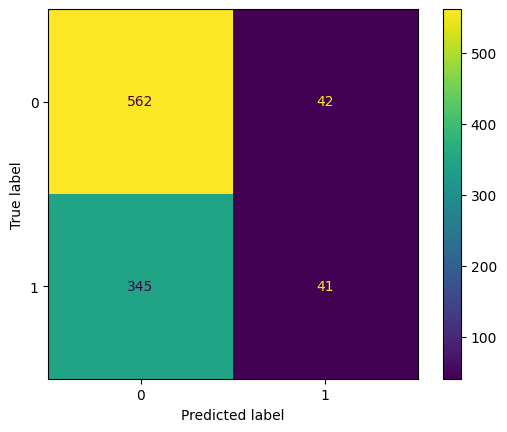



dwoagvhd24 Ratio:  0.27213910230489285
              precision    recall  f1-score   support

         0.0       0.77      0.55      0.64       721
         1.0       0.32      0.57      0.41       269

    accuracy                           0.56       990
   macro avg       0.55      0.56      0.53       990
weighted avg       0.65      0.56      0.58       990



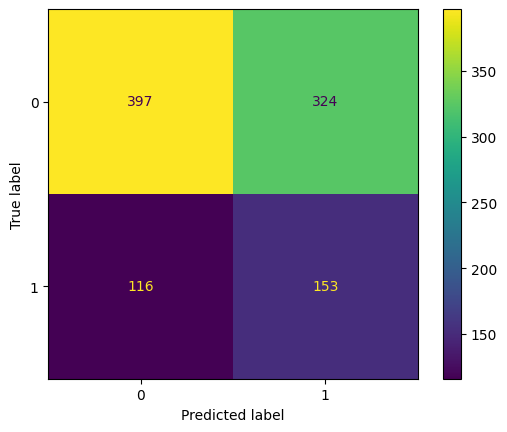



agvhd34 Ratio:  0.14577436312171452
              precision    recall  f1-score   support

         0.0       0.89      0.58      0.70       846
         1.0       0.19      0.57      0.28       144

    accuracy                           0.58       990
   macro avg       0.54      0.58      0.49       990
weighted avg       0.79      0.58      0.64       990



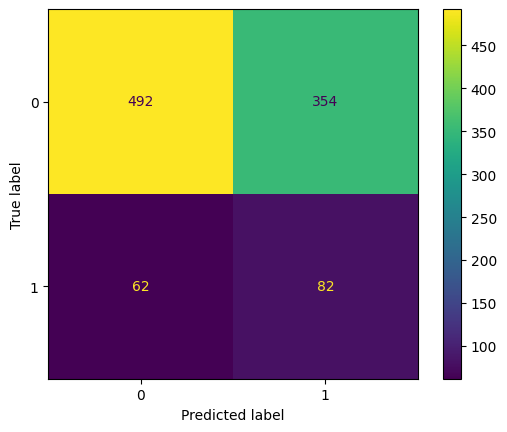



dwoagvhd34 Ratio:  0.39446016983420945
              precision    recall  f1-score   support

         0.0       0.62      0.87      0.72       599
         1.0       0.48      0.19      0.27       391

    accuracy                           0.60       990
   macro avg       0.55      0.53      0.50       990
weighted avg       0.57      0.60      0.54       990



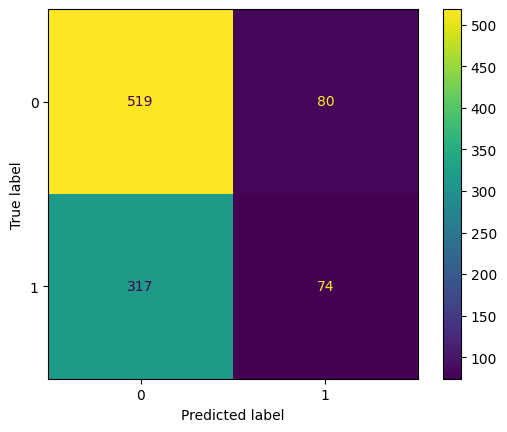



cgvhd Ratio:  0.48119692680954307
              precision    recall  f1-score   support

         0.0       0.58      0.56      0.57       514
         1.0       0.54      0.56      0.55       476

    accuracy                           0.56       990
   macro avg       0.56      0.56      0.56       990
weighted avg       0.56      0.56      0.56       990



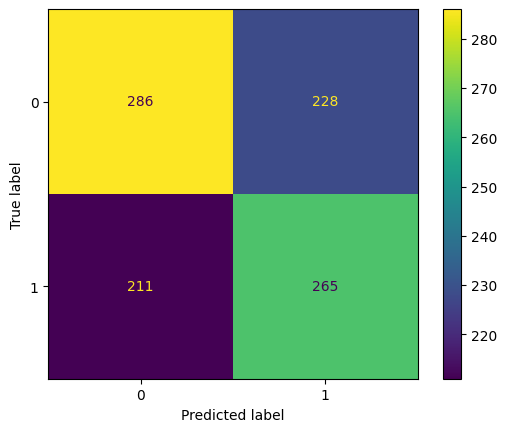



dwocgvhd Ratio:  0.30752122927618275
              precision    recall  f1-score   support

         0.0       0.70      0.99      0.82       686
         1.0       0.63      0.06      0.10       304

    accuracy                           0.70       990
   macro avg       0.67      0.52      0.46       990
weighted avg       0.68      0.70      0.60       990



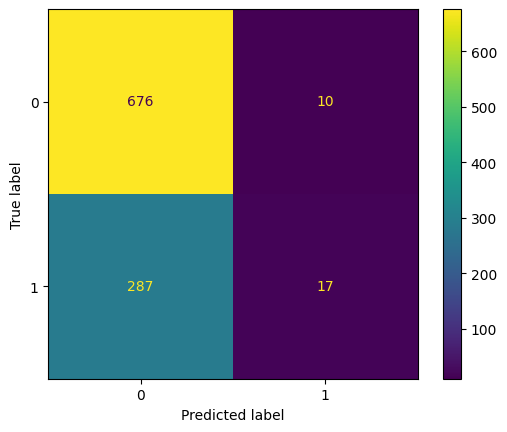



dfs Ratio:  0.625353821269713
              precision    recall  f1-score   support

         0.0       0.55      0.16      0.25       371
         1.0       0.65      0.92      0.76       619

    accuracy                           0.64       990
   macro avg       0.60      0.54      0.50       990
weighted avg       0.61      0.64      0.57       990



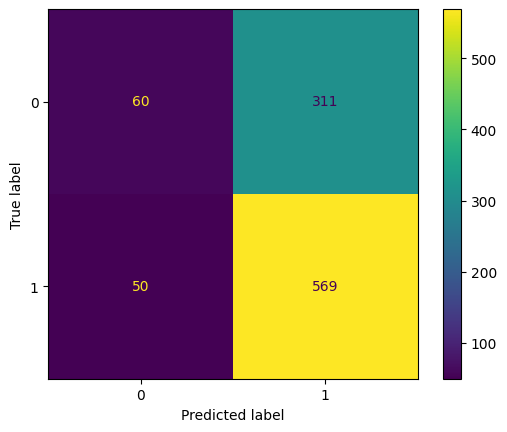



trm Ratio:  0.1957137080469066
              precision    recall  f1-score   support

         0.0       0.87      0.57      0.69       796
         1.0       0.27      0.65      0.38       194

    accuracy                           0.59       990
   macro avg       0.57      0.61      0.54       990
weighted avg       0.75      0.59      0.63       990



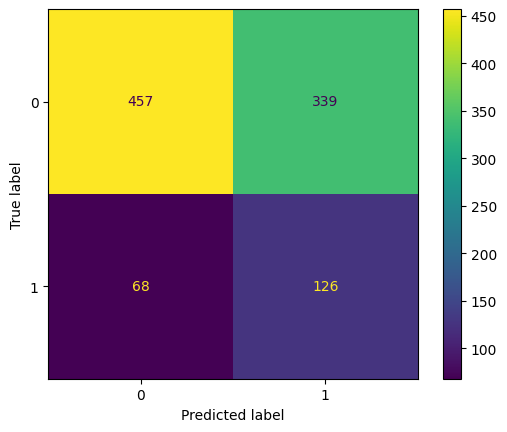



rel Ratio:  0.4284270117266478
              precision    recall  f1-score   support

         0.0       0.59      0.86      0.70       566
         1.0       0.53      0.21      0.30       424

    accuracy                           0.58       990
   macro avg       0.56      0.53      0.50       990
weighted avg       0.57      0.58      0.53       990



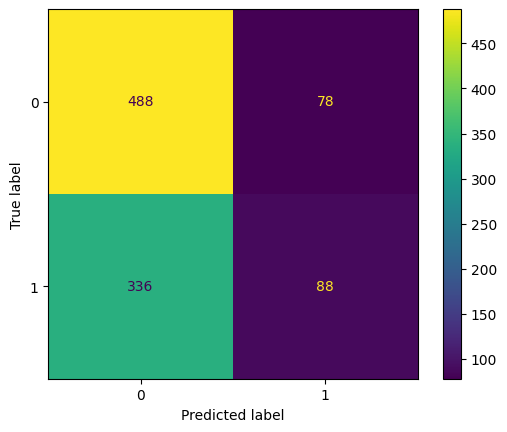



dead Ratio:  0.547513141932875
              precision    recall  f1-score   support

         0.0       0.54      0.38      0.45       448
         1.0       0.59      0.73      0.65       542

    accuracy                           0.58       990
   macro avg       0.57      0.56      0.55       990
weighted avg       0.57      0.58      0.56       990



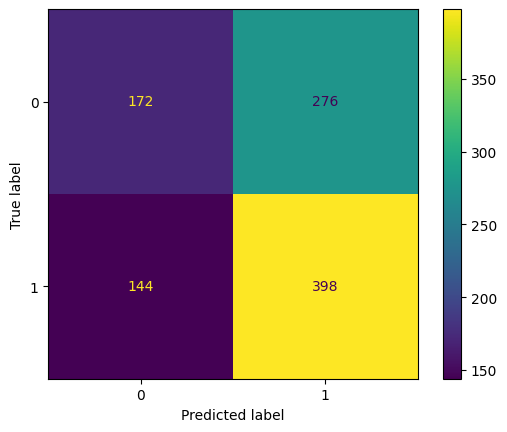



pgf Ratio:  0.031540638900121314
              precision    recall  f1-score   support

         0.0       0.98      0.67      0.79       959
         1.0       0.04      0.48      0.08        31

    accuracy                           0.66       990
   macro avg       0.51      0.57      0.44       990
weighted avg       0.95      0.66      0.77       990



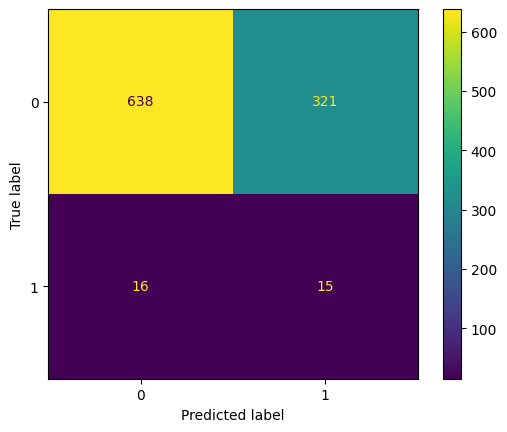

In [30]:
for i in range(len(cols_outcome)):
  outcome = cols_outcome[i] #outcome is the label we are currently running the model on
  y_i=y[outcome] # y_i is the outcome data for the label outcome

  #split our data into X and y
  X_train, X_test, y_train, y_test = train_test_split(X, y_i, test_size = 0.2, random_state = 42, stratify=y_i)

  #checking if this label is balanced or imbalanced
  ratio = y_i.sum() / len(y_i)
  print("\n")
  print(outcome, "Ratio: ", ratio)
  if ratio >= .7:
    inliers  = main_data[main_data[outcome] == 1]
    inliers  = inliers.drop([outcome], axis=1)
    outliers = main_data[main_data[outcome]== 0]
    outliers = outliers.drop([outcome], axis=1)
    inliers_train, inliers_test = train_test_split(inliers, test_size = 0.2, random_state = 42)
  elif ratio <= .3:
    inliers  = main_data[main_data[outcome] == 0]
    inliers  = inliers.drop([outcome], axis=1)
    outliers = main_data[main_data[outcome]== 1]
    outliers = outliers.drop([outcome], axis=1)
    inliers_train, inliers_test = train_test_split(inliers, test_size = 0.2, random_state = 42)

  #if the label is imbalanced, run anomany classification models
  if ratio >= .7 or ratio <= .3:

    #oversample the data to make up for the imbalance
    sm = SMOTE(sampling_strategy='minority', random_state=42)
    X_res, y_res = sm.fit_resample(X_train, y_train)
    X_train = X_res
    y_train = y_res

  #model
  clf = RidgeClassifier().fit(X_train, y_train)
  predictions = clf.predict(X_test) # 1/0

  print(classification_report(y_test, predictions))
  cm   = confusion_matrix(y_test, predictions, labels = [0, 1])
  disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [0, 1])
  disp.plot()
  plt.show()


##Decision Tree Classifier

In [31]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier



anc Ratio:  0.9811969268095431
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        19
         1.0       0.98      0.98      0.98       971

    accuracy                           0.96       990
   macro avg       0.49      0.49      0.49       990
weighted avg       0.96      0.96      0.96       990



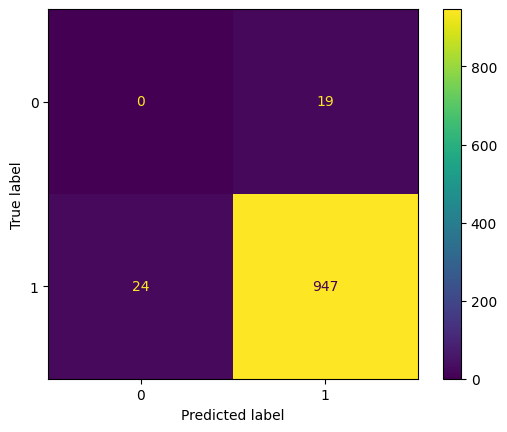



dwoancrel Ratio:  0.01678123736352608
              precision    recall  f1-score   support

         0.0       0.98      0.98      0.98       973
         1.0       0.04      0.06      0.05        17

    accuracy                           0.96       990
   macro avg       0.51      0.52      0.51       990
weighted avg       0.97      0.96      0.96       990



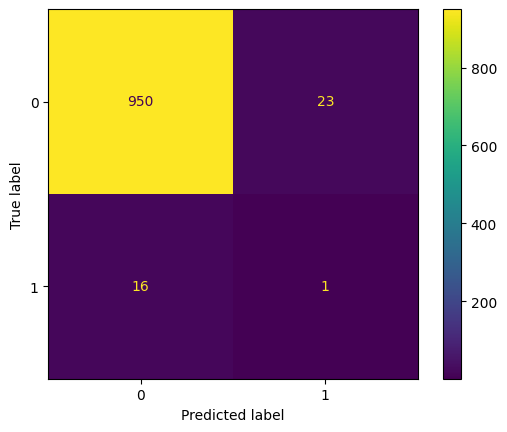



plt Ratio:  0.9458147998382531
              precision    recall  f1-score   support

         0.0       0.16      0.17      0.17        54
         1.0       0.95      0.95      0.95       936

    accuracy                           0.91       990
   macro avg       0.56      0.56      0.56       990
weighted avg       0.91      0.91      0.91       990



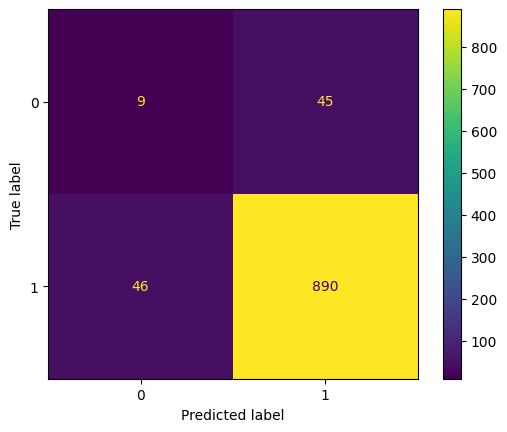



dwoplt Ratio:  0.04892842701172665
              precision    recall  f1-score   support

         0.0       0.95      0.93      0.94       942
         1.0       0.07      0.10      0.09        48

    accuracy                           0.89       990
   macro avg       0.51      0.52      0.52       990
weighted avg       0.91      0.89      0.90       990



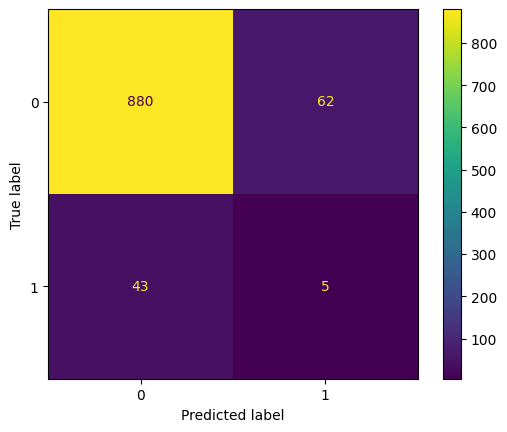



agvhd24 Ratio:  0.3896077638495754
              precision    recall  f1-score   support

         0.0       0.64      0.60      0.62       604
         1.0       0.42      0.47      0.44       386

    accuracy                           0.55       990
   macro avg       0.53      0.53      0.53       990
weighted avg       0.55      0.55      0.55       990



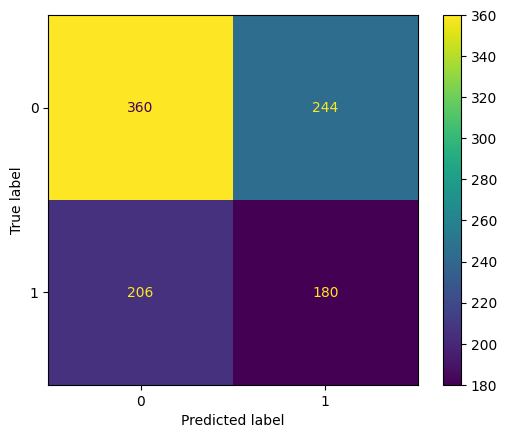



dwoagvhd24 Ratio:  0.27213910230489285
              precision    recall  f1-score   support

         0.0       0.73      0.70      0.72       721
         1.0       0.27      0.30      0.28       269

    accuracy                           0.59       990
   macro avg       0.50      0.50      0.50       990
weighted avg       0.60      0.59      0.60       990



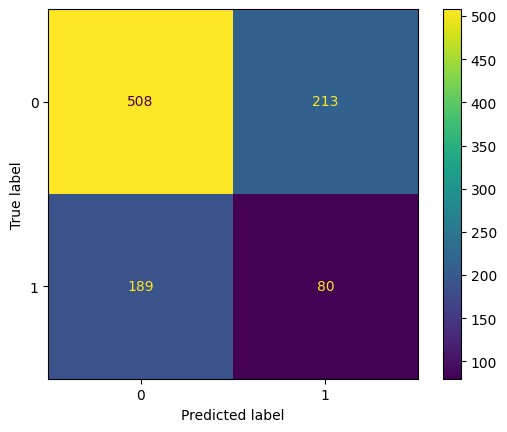



agvhd34 Ratio:  0.14577436312171452
              precision    recall  f1-score   support

         0.0       0.86      0.85      0.85       846
         1.0       0.18      0.20      0.19       144

    accuracy                           0.75       990
   macro avg       0.52      0.52      0.52       990
weighted avg       0.76      0.75      0.76       990



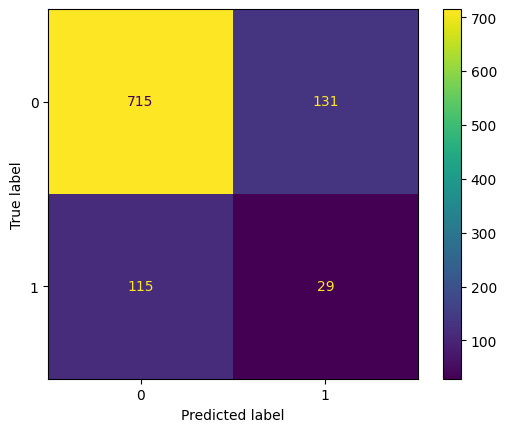



dwoagvhd34 Ratio:  0.39446016983420945
              precision    recall  f1-score   support

         0.0       0.61      0.61      0.61       599
         1.0       0.40      0.40      0.40       391

    accuracy                           0.53       990
   macro avg       0.51      0.51      0.51       990
weighted avg       0.53      0.53      0.53       990



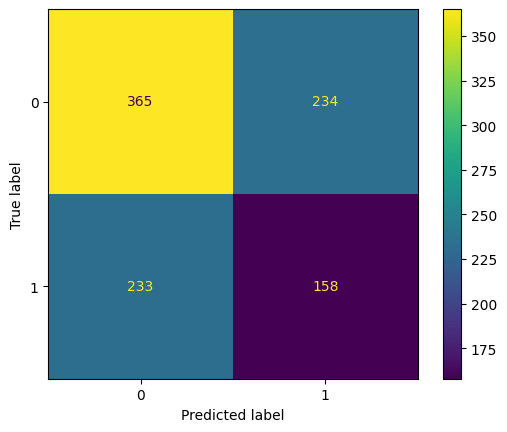



cgvhd Ratio:  0.48119692680954307
              precision    recall  f1-score   support

         0.0       0.55      0.58      0.57       514
         1.0       0.52      0.50      0.51       476

    accuracy                           0.54       990
   macro avg       0.54      0.54      0.54       990
weighted avg       0.54      0.54      0.54       990



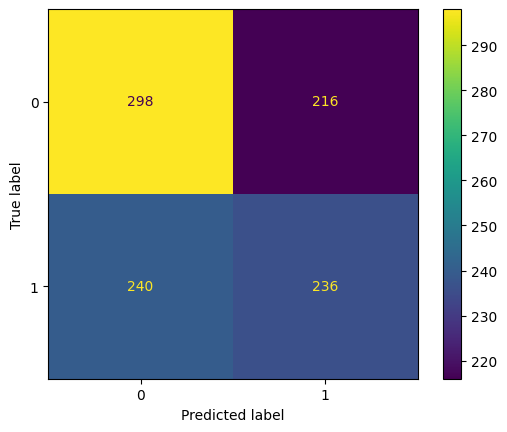



dwocgvhd Ratio:  0.30752122927618275
              precision    recall  f1-score   support

         0.0       0.71      0.67      0.69       686
         1.0       0.34      0.39      0.36       304

    accuracy                           0.58       990
   macro avg       0.53      0.53      0.53       990
weighted avg       0.60      0.58      0.59       990



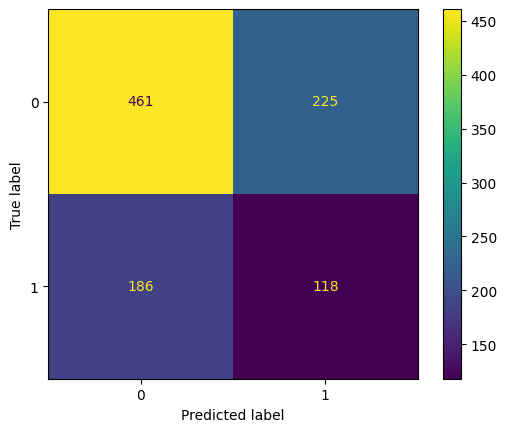



dfs Ratio:  0.625353821269713
              precision    recall  f1-score   support

         0.0       0.38      0.38      0.38       371
         1.0       0.63      0.63      0.63       619

    accuracy                           0.54       990
   macro avg       0.50      0.50      0.50       990
weighted avg       0.54      0.54      0.54       990



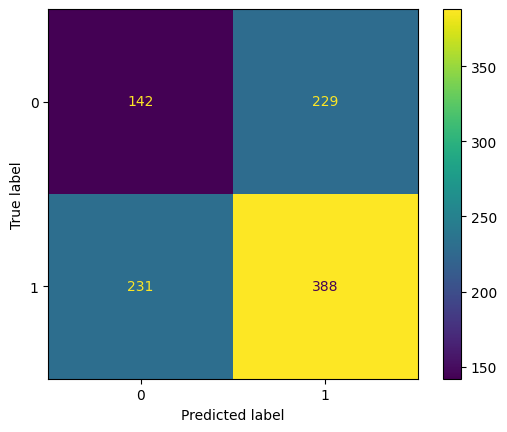



trm Ratio:  0.1957137080469066
              precision    recall  f1-score   support

         0.0       0.82      0.80      0.81       796
         1.0       0.25      0.27      0.26       194

    accuracy                           0.70       990
   macro avg       0.53      0.54      0.54       990
weighted avg       0.71      0.70      0.70       990



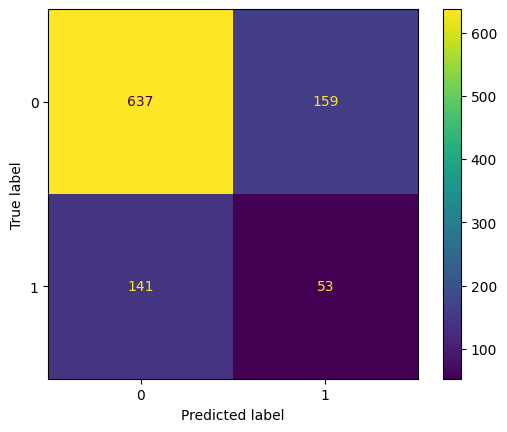



rel Ratio:  0.4284270117266478
              precision    recall  f1-score   support

         0.0       0.61      0.61      0.61       566
         1.0       0.48      0.48      0.48       424

    accuracy                           0.55       990
   macro avg       0.55      0.55      0.55       990
weighted avg       0.55      0.55      0.55       990



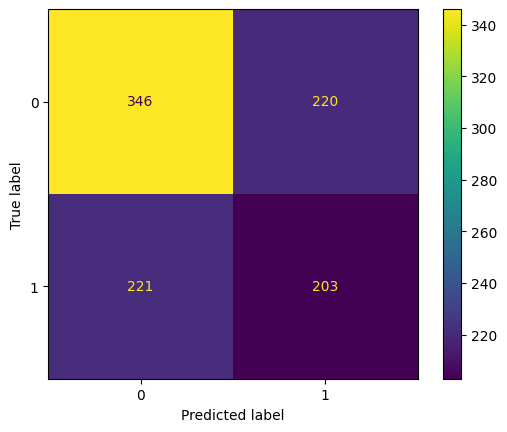



dead Ratio:  0.547513141932875
              precision    recall  f1-score   support

         0.0       0.49      0.50      0.49       448
         1.0       0.58      0.57      0.58       542

    accuracy                           0.54       990
   macro avg       0.53      0.53      0.53       990
weighted avg       0.54      0.54      0.54       990



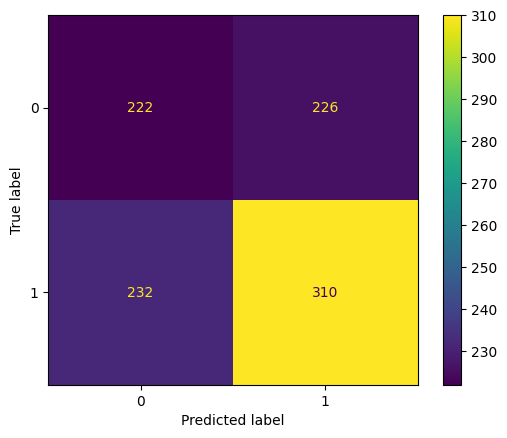



pgf Ratio:  0.031540638900121314
              precision    recall  f1-score   support

         0.0       0.97      0.96      0.97       959
         1.0       0.00      0.00      0.00        31

    accuracy                           0.93       990
   macro avg       0.48      0.48      0.48       990
weighted avg       0.94      0.93      0.94       990



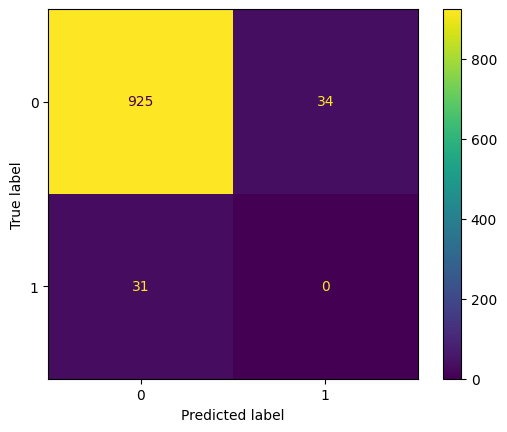

In [32]:
for i in range(len(cols_outcome)):
  outcome = cols_outcome[i] #outcome is the label we are currently running the model on
  y_i=y[outcome] # y_i is the outcome data for the label outcome

  #split our data into X and y
  X_train, X_test, y_train, y_test = train_test_split(X, y_i, test_size = 0.2, random_state = 42, stratify=y_i)

  #checking if this label is balanced or imbalanced
  ratio = y_i.sum() / len(y_i)
  print("\n")
  print(outcome, "Ratio: ", ratio)
  if ratio >= .7:
    inliers  = main_data[main_data[outcome] == 1]
    inliers  = inliers.drop([outcome], axis=1)
    outliers = main_data[main_data[outcome]== 0]
    outliers = outliers.drop([outcome], axis=1)
    inliers_train, inliers_test = train_test_split(inliers, test_size = 0.2, random_state = 42)
  elif ratio <= .3:
    inliers  = main_data[main_data[outcome] == 0]
    inliers  = inliers.drop([outcome], axis=1)
    outliers = main_data[main_data[outcome]== 1]
    outliers = outliers.drop([outcome], axis=1)
    inliers_train, inliers_test = train_test_split(inliers, test_size = 0.2, random_state = 42)

  #if the label is imbalanced, run anomany classification models
  if ratio >= .7 or ratio <= .3:

    #oversample the data to make up for the imbalance
    sm = SMOTE(sampling_strategy='minority', random_state=42)
    X_res, y_res = sm.fit_resample(X_train, y_train)
    X_train = X_res
    y_train = y_res

  #model
  clf = DecisionTreeClassifier(random_state=0)
  clf.fit(X_train, y_train)
  predictions = clf.predict(X_test) # 1/0

  print(classification_report(y_test, predictions))
  cm   = confusion_matrix(y_test, predictions, labels = [0, 1])
  disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [0, 1])
  disp.plot()
  plt.show()


##SVC model

In [33]:
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC



anc Ratio:  0.9811969268095431
              precision    recall  f1-score   support

         0.0       0.02      0.05      0.03        19
         1.0       0.98      0.95      0.97       971

    accuracy                           0.93       990
   macro avg       0.50      0.50      0.50       990
weighted avg       0.96      0.93      0.95       990



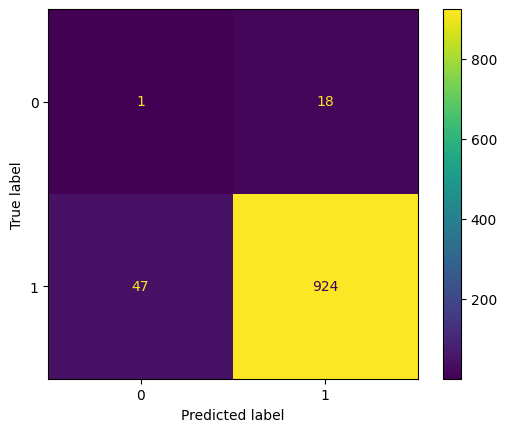



dwoancrel Ratio:  0.01678123736352608
              precision    recall  f1-score   support

         0.0       0.98      0.95      0.96       973
         1.0       0.04      0.12      0.06        17

    accuracy                           0.93       990
   macro avg       0.51      0.53      0.51       990
weighted avg       0.97      0.93      0.95       990



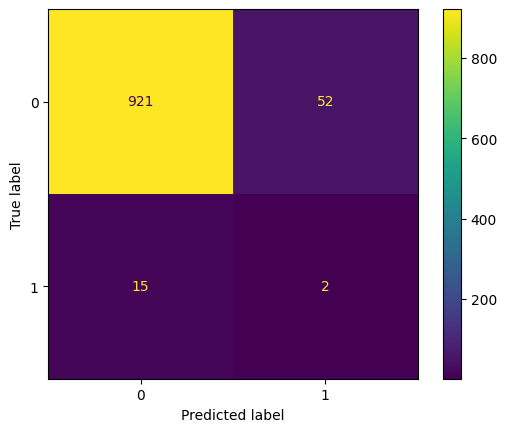



plt Ratio:  0.9458147998382531
              precision    recall  f1-score   support

         0.0       0.07      0.09      0.08        54
         1.0       0.95      0.93      0.94       936

    accuracy                           0.88       990
   macro avg       0.51      0.51      0.51       990
weighted avg       0.90      0.88      0.89       990



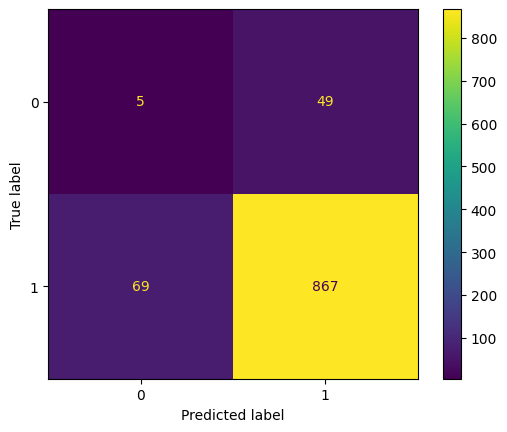



dwoplt Ratio:  0.04892842701172665
              precision    recall  f1-score   support

         0.0       0.96      0.92      0.94       942
         1.0       0.09      0.15      0.11        48

    accuracy                           0.89       990
   macro avg       0.52      0.54      0.53       990
weighted avg       0.91      0.89      0.90       990



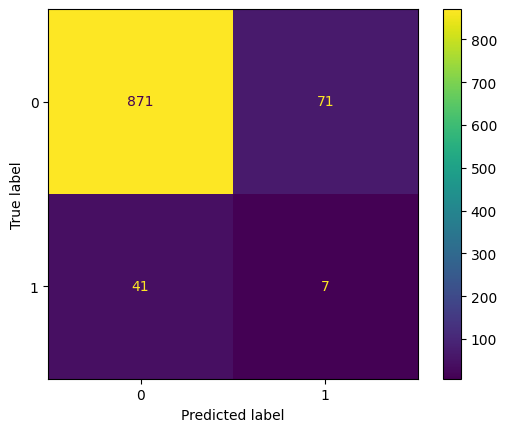



agvhd24 Ratio:  0.3896077638495754
              precision    recall  f1-score   support

         0.0       0.63      0.91      0.75       604
         1.0       0.55      0.18      0.27       386

    accuracy                           0.62       990
   macro avg       0.59      0.54      0.51       990
weighted avg       0.60      0.62      0.56       990



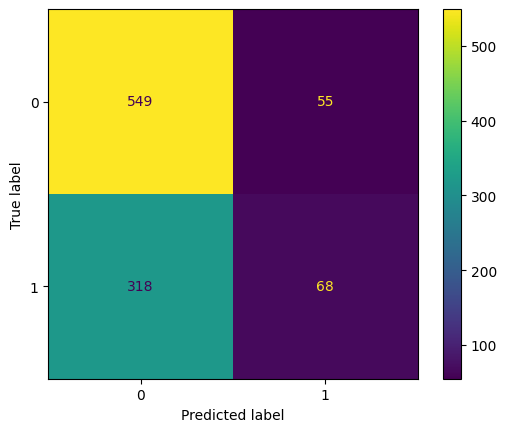



dwoagvhd24 Ratio:  0.27213910230489285
              precision    recall  f1-score   support

         0.0       0.75      0.73      0.74       721
         1.0       0.32      0.34      0.33       269

    accuracy                           0.62       990
   macro avg       0.53      0.53      0.53       990
weighted avg       0.63      0.62      0.63       990



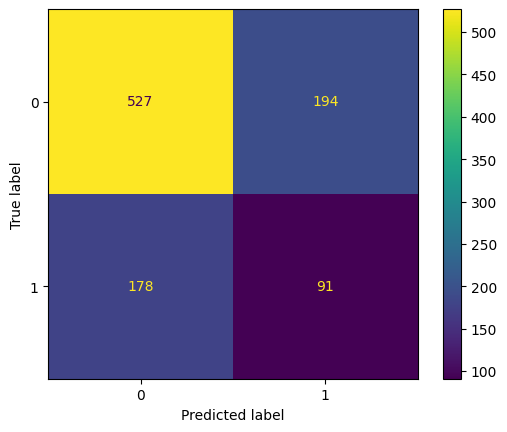



agvhd34 Ratio:  0.14577436312171452
              precision    recall  f1-score   support

         0.0       0.86      0.83      0.84       846
         1.0       0.16      0.20      0.18       144

    accuracy                           0.74       990
   macro avg       0.51      0.51      0.51       990
weighted avg       0.76      0.74      0.75       990



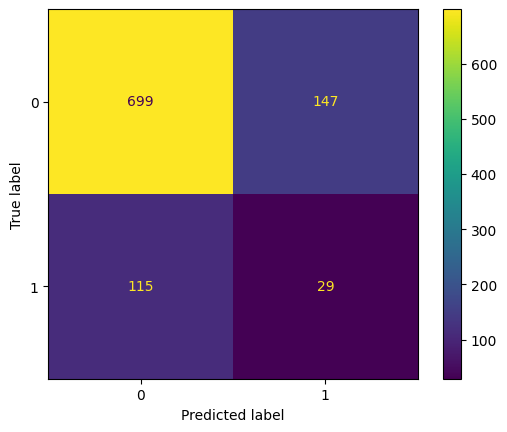



dwoagvhd34 Ratio:  0.39446016983420945
              precision    recall  f1-score   support

         0.0       0.62      0.89      0.73       599
         1.0       0.50      0.17      0.25       391

    accuracy                           0.60       990
   macro avg       0.56      0.53      0.49       990
weighted avg       0.57      0.60      0.54       990



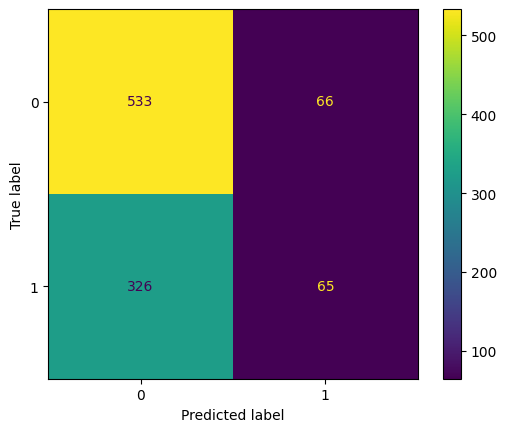



cgvhd Ratio:  0.48119692680954307
              precision    recall  f1-score   support

         0.0       0.59      0.56      0.58       514
         1.0       0.55      0.58      0.57       476

    accuracy                           0.57       990
   macro avg       0.57      0.57      0.57       990
weighted avg       0.57      0.57      0.57       990



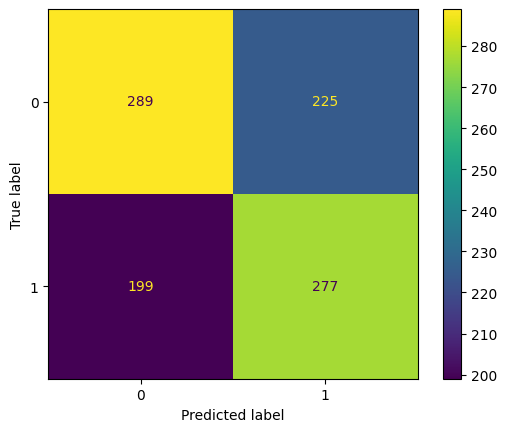



dwocgvhd Ratio:  0.30752122927618275
              precision    recall  f1-score   support

         0.0       0.70      0.99      0.82       686
         1.0       0.62      0.05      0.09       304

    accuracy                           0.70       990
   macro avg       0.66      0.52      0.46       990
weighted avg       0.68      0.70      0.60       990



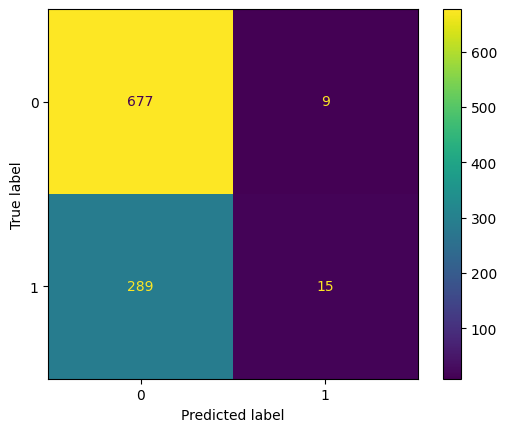



dfs Ratio:  0.625353821269713
              precision    recall  f1-score   support

         0.0       0.51      0.16      0.24       371
         1.0       0.64      0.91      0.75       619

    accuracy                           0.63       990
   macro avg       0.58      0.53      0.50       990
weighted avg       0.59      0.63      0.56       990



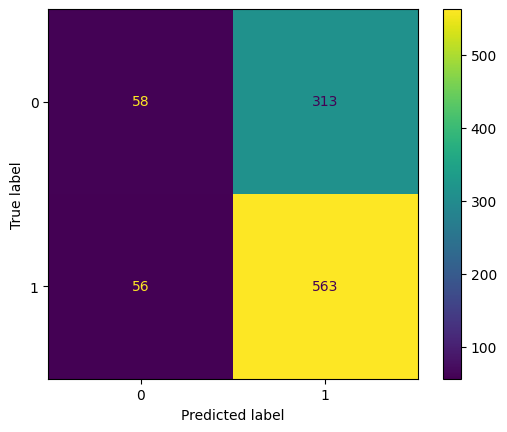



trm Ratio:  0.1957137080469066
              precision    recall  f1-score   support

         0.0       0.83      0.81      0.82       796
         1.0       0.29      0.32      0.31       194

    accuracy                           0.71       990
   macro avg       0.56      0.57      0.56       990
weighted avg       0.73      0.71      0.72       990



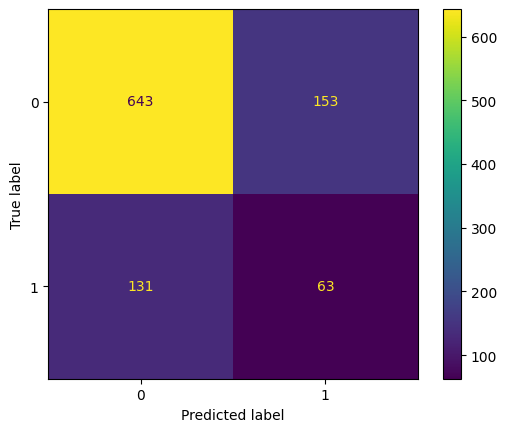



rel Ratio:  0.4284270117266478
              precision    recall  f1-score   support

         0.0       0.63      0.87      0.73       566
         1.0       0.64      0.30      0.41       424

    accuracy                           0.63       990
   macro avg       0.63      0.59      0.57       990
weighted avg       0.63      0.63      0.59       990



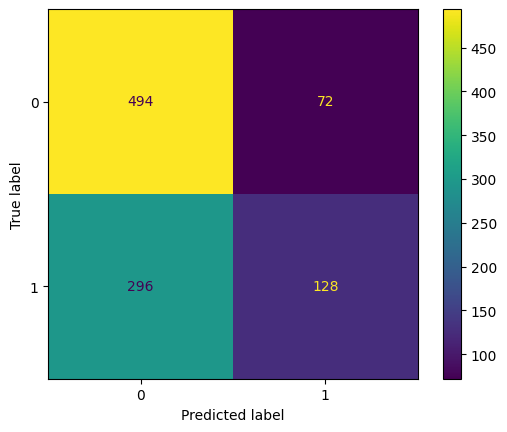



dead Ratio:  0.547513141932875
              precision    recall  f1-score   support

         0.0       0.55      0.42      0.47       448
         1.0       0.60      0.72      0.65       542

    accuracy                           0.58       990
   macro avg       0.58      0.57      0.56       990
weighted avg       0.58      0.58      0.57       990



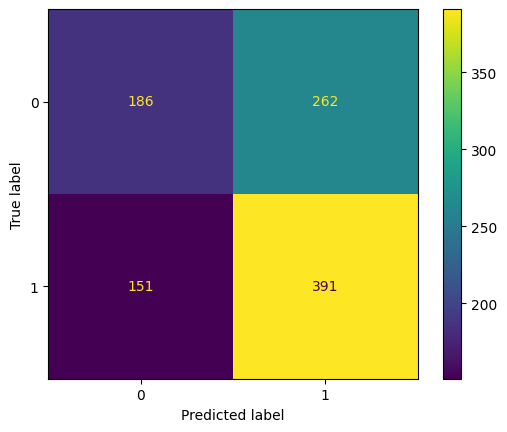



pgf Ratio:  0.031540638900121314
              precision    recall  f1-score   support

         0.0       0.97      0.95      0.96       959
         1.0       0.02      0.03      0.02        31

    accuracy                           0.92       990
   macro avg       0.49      0.49      0.49       990
weighted avg       0.94      0.92      0.93       990



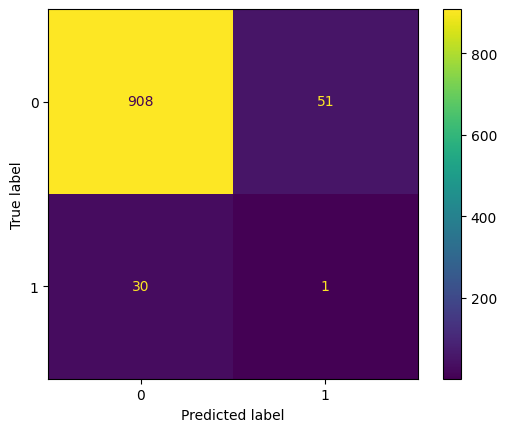

In [34]:
for i in range(len(cols_outcome)):
  outcome = cols_outcome[i] #outcome is the label we are currently running the model on
  y_i=y[outcome] # y_i is the outcome data for the label outcome

  #split our data into X and y
  X_train, X_test, y_train, y_test = train_test_split(X, y_i, test_size = 0.2, random_state = 42, stratify=y_i)

  #checking if this label is balanced or imbalanced
  ratio = y_i.sum() / len(y_i)
  print("\n")
  print(outcome, "Ratio: ", ratio)
  if ratio >= .7:
    inliers  = main_data[main_data[outcome] == 1]
    inliers  = inliers.drop([outcome], axis=1)
    outliers = main_data[main_data[outcome]== 0]
    outliers = outliers.drop([outcome], axis=1)
    inliers_train, inliers_test = train_test_split(inliers, test_size = 0.2, random_state = 42)
  elif ratio <= .3:
    inliers  = main_data[main_data[outcome] == 0]
    inliers  = inliers.drop([outcome], axis=1)
    outliers = main_data[main_data[outcome]== 1]
    outliers = outliers.drop([outcome], axis=1)
    inliers_train, inliers_test = train_test_split(inliers, test_size = 0.2, random_state = 42)

  #if the label is imbalanced, run anomany classification models
  if ratio >= .7 or ratio <= .3:

    #oversample the data to make up for the imbalance
    sm = SMOTE(sampling_strategy='minority', random_state=42)
    X_res, y_res = sm.fit_resample(X_train, y_train)
    X_train = X_res
    y_train = y_res

  #model
  clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))

  clf.fit(X_train, y_train)
  predictions = clf.predict(X_test) # 1/0

  print(classification_report(y_test, predictions))
  cm   = confusion_matrix(y_test, predictions, labels = [0, 1])
  disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [0, 1])
  disp.plot()
  plt.show()
